In [27]:
import pandas as pd                        # Data Manipulation
import numpy as np                         # Numeric Calculation
import seaborn as sns                      # Advance Data Visualization
import matplotlib.pyplot as plt            # Data Visualization  
import sweetviz as sv # Used for auto EDA

# Normal Quantile-Quantile Plot
import scipy.stats as stats
import pylab

#Imputation
from sklearn.impute import SimpleImputer

#Column Trasformer
from sklearn.compose import ColumnTransformer

# Outlier treatment
from feature_engine.outliers import Winsorizer

# Label Encoder
from sklearn.preprocessing import LabelEncoder

# MinMax Scalre
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn.pipeline import Pipeline
import joblib
import pickle


# Warnings
import warnings 
warnings.filterwarnings('ignore')


# Model selection packages
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



# Train Test split
from sklearn.model_selection import train_test_split


# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Confusion matrix
import sklearn.metrics as skmet

In [2]:
# import dataset

Lim_Data = pd.read_csv(r"G:\Project_1\Data set\Final Data selection\Lim_fault_solar_data.csv")
Max_Data = pd.read_csv(r"G:\Project_1\Data set\Final Data selection\Max_fault_solar_data.csv")

# Each data file includes the following columns:

1.	Time: Time of real measurement in seconds. The average sampling is 𝑇! = 9.9989 𝜇𝑠.
2.	Ipv: PV array current measurement.
3.	Vpv: PV array voltage measurement.
4.	Vdc: DC voltage measurement.
5.	ia: Phase_A current measurement.
6.	ib: Phase_B current measurement.
7.	ic: Phase_C current measurement.
8.	va: Phase_A voltage measurement.
9.	vb: Phase_B voltage measurement.
10.	vc: Phase_C voltage measurement.
11.	Iabc: Positive-sequence estimated current magnitude.
12.	If: Positive-sequence estimated current frequency.
13.	Vabc: Positive-sequence estimated voltage magnitude.
14.	Vf: Positive-sequence estimated vurrent frequency.

In [3]:
# Read Limited data

Lim_Data


Time       Ipv         Vpv         Vdc        ia        ib  \
0       0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112   
1       0.010027  1.539215  101.251221  143.261719  0.086425 -0.490112   
2       0.020026  1.637604  101.031494  143.554688 -0.155274  0.469971   
3       0.030025  1.577057  101.287842  142.968750  0.106566 -0.456543   
4       0.040024  1.613007  101.049805  143.847656 -0.155274  0.456543   
...          ...       ...         ...         ...       ...       ...   
10930  14.358892  1.531647  102.056885  142.675781  0.354979 -0.503540   
10931  14.368891  1.565704  101.104736  143.261719 -0.403687  0.523682   
10932  14.378890  1.501373  101.556396  142.968750  0.361693 -0.530396   
10933  14.388889  1.492859  100.970459  143.847656 -0.396974  0.537109   
10934  14.398888  1.516510  102.166748  142.968750  0.348266 -0.523682   

             ic          va          vb          vc      Iabc         If  \
0     -0.354985   41.744537 -149.872894  109.064585  1.000000  50.000000   
1      0.349971  -42.311096  149.029083 -108.377482  1.000000  50.000000   
2     -0.307988   41.515503 -149.933167  109.104767  1.000000  50.000000   
3      0.336543  -42.106171  150.222473 -109.249420  0.461228  49.921509   
4     -0.314702   41.370850 -150.162201  109.245402  0.311221  49.594346   
...         ...         ...         ...         ...       ...        ...   
10930  0.148555 -108.381500  152.585144  -40.760091  0.519110  50.036816   
10931 -0.126714  110.756226 -149.559479   43.311615  0.519713  50.087054   
10932  0.182124 -108.803406  152.319946  -40.470785  0.522856  50.138598   
10933 -0.106572  110.720062 -150.451508   42.560221  0.525012  49.932554   
10934  0.188838 -108.586426  151.524353  -41.503448  0.525349  49.924121   

             Vabc         Vf Fault_type  
0        1.000000  50.000000        F0L  
1        1.000000  50.000000        F0L  
2        1.000000  50.000000        F0L  
3      151.655756  50.078264        F0L  
4      154.027080  50.193078        F0L  
...           ...        ...        ...  
10930  155.672324  49.999645        F7L  
10931  155.706972  49.992937        F7L  
10932  155.636851  49.996147        F7L  
10933  155.571019  50.008771        F7L  
10934  155.553069  50.005752        F7L  

[10935 rows x 15 columns]

In [4]:
# Read Max data

Max_Data

Time       Ipv        Vpv         Vdc        ia        ib  \
0       0.000041  2.369843  90.429688  147.949219  0.616820 -0.530396   
1       0.010040  2.378357  90.368652  148.242188 -0.678956  0.570679   
2       0.020039  2.373627  90.460205  148.535156  0.603393 -0.537109   
3       0.030038  2.368896  90.423584  148.242188 -0.685670  0.570679   
4       0.040037  2.362274  90.435791  148.242188  0.630248 -0.523682   
...          ...       ...        ...         ...       ...       ...   
10696  14.353236  2.363220  87.280273  145.019531  0.542968 -0.718384   
10697  14.363235  2.308350  86.737061  145.312500 -0.631959  0.590820   
10698  14.373234  2.341461  87.103271  145.312500  0.536254 -0.711670   
10699  14.383233  2.426605  87.011719  145.312500 -0.625245  0.584106   
10700  14.393232  2.352814  87.225342  145.312500  0.549682 -0.691528   

             ic          va          vb         vc      Iabc         If  \
0     -0.160283 -146.003418  120.255127  25.595601  1.000000  50.000000   
1      0.047847  148.546906 -119.881439 -24.723663  1.000000  50.000000   
2     -0.187139 -145.027008  120.315399  26.109924  1.000000  50.000000   
3      0.041133  147.341461 -119.736786 -26.105906  0.440380  50.078491   
4     -0.166997 -143.279114  120.942230  26.680501  0.618996  50.248673   
...         ...         ...         ...        ...       ...        ...   
10696  0.161982 -125.233612  143.013916 -18.270518  0.700222  49.837684   
10697 -0.005864  126.101532 -142.121887  18.503571  0.696735  49.979017   
10698  0.168696 -124.751434  142.893372 -18.073629  0.692128  50.219535   
10699  0.000850  125.438538 -143.050079  18.379008  0.690443  50.113452   
10700  0.168696 -124.835815  143.013916 -17.792358  0.688933  49.903225   

             Vabc         Vf Fault_type  
0        1.000000  50.000000        F0M  
1        1.000000  50.000000        F0M  
2        1.000000  50.000000        F0M  
3      118.275197  49.921509        F0M  
4       90.022162  49.606494        F0M  
...           ...        ...        ...  
10696  155.419819  49.997678        F7M  
10697  155.409061  50.000249        F7M  
10698  155.370171  50.000483        F7M  
10699  155.363070  49.999983        F7M  
10700  155.388027  50.003751        F7M  

[10701 rows x 15 columns]

In [5]:
# Concatenate the two datasets
Fault_Data = pd.concat([Lim_Data, Max_Data], ignore_index = True)

# View merged data
Fault_Data

Time       Ipv         Vpv         Vdc        ia        ib  \
0       0.000028  1.572327  101.348877  144.140625 -0.135133  0.490112   
1       0.010027  1.539215  101.251221  143.261719  0.086425 -0.490112   
2       0.020026  1.637604  101.031494  143.554688 -0.155274  0.469971   
3       0.030025  1.577057  101.287842  142.968750  0.106566 -0.456543   
4       0.040024  1.613007  101.049805  143.847656 -0.155274  0.456543   
...          ...       ...         ...         ...       ...       ...   
21631  14.353236  2.363220   87.280273  145.019531  0.542968 -0.718384   
21632  14.363235  2.308350   86.737061  145.312500 -0.631959  0.590820   
21633  14.373234  2.341461   87.103271  145.312500  0.536254 -0.711670   
21634  14.383233  2.426605   87.011719  145.312500 -0.625245  0.584106   
21635  14.393232  2.352814   87.225342  145.312500  0.549682 -0.691528   

             ic          va          vb          vc      Iabc         If  \
0     -0.354985   41.744537 -149.872894  109.064585  1.000000  50.000000   
1      0.349971  -42.311096  149.029083 -108.377482  1.000000  50.000000   
2     -0.307988   41.515503 -149.933167  109.104767  1.000000  50.000000   
3      0.336543  -42.106171  150.222473 -109.249420  0.461228  49.921509   
4     -0.314702   41.370850 -150.162201  109.245402  0.311221  49.594346   
...         ...         ...         ...         ...       ...        ...   
21631  0.161982 -125.233612  143.013916  -18.270518  0.700222  49.837684   
21632 -0.005864  126.101532 -142.121887   18.503571  0.696735  49.979017   
21633  0.168696 -124.751434  142.893372  -18.073629  0.692128  50.219535   
21634  0.000850  125.438538 -143.050079   18.379008  0.690443  50.113452   
21635  0.168696 -124.835815  143.013916  -17.792358  0.688933  49.903225   

             Vabc         Vf Fault_type  
0        1.000000  50.000000        F0L  
1        1.000000  50.000000        F0L  
2        1.000000  50.000000        F0L  
3      151.655756  50.078264        F0L  
4      154.027080  50.193078        F0L  
...           ...        ...        ...  
21631  155.419819  49.997678        F7M  
21632  155.409061  50.000249        F7M  
21633  155.370171  50.000483        F7M  
21634  155.363070  49.999983        F7M  
21635  155.388027  50.003751        F7M  

[21636 rows x 15 columns]

In [6]:
# Check columns
Fault_Data.columns

Index(['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf', 'Fault_type'],
      dtype='object')

In [7]:
Fault_Data.describe()

Time           Ipv           Vpv           Vdc            ia  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean       6.902199      1.778313     88.101274    139.374615     -0.023572   
std        4.082638      0.603779     23.245378     27.345157      0.460140   
min        0.000028     -0.561005      0.793457      0.878906     -1.222779   
25%        3.379698      1.462585     87.005615    143.261719     -0.430543   
50%        6.759524      1.793701     91.308594    144.433594     -0.000855   
75%       10.348985      2.284698    101.403809    147.363281      0.381835   
max       14.398888      3.557129    111.022949    250.195312      4.484008   

                 ib            ic            va            vb            vc  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean       0.003651     -0.022476      0.826952      0.822367      0.820387   
std        0.623148      0.624196    122.682533    115.623988     88.662816   
min       -5.008545    -10.707769   -160.516968   -160.697784   -157.656047   
25%       -0.416260     -0.247563   -130.046349   -120.881958    -66.751480   
50%        0.006714     -0.019292      0.277252      0.982437      0.648931   
75%        0.422974      0.175410    131.691780    122.153702     68.808772   
max        6.445312      5.895625    159.866028    159.829865    158.773092   

               Iabc            If          Vabc            Vf  
count  21636.000000  21636.000000  21636.000000  21636.000000  
mean       0.564941     49.646151    155.074577     49.999649  
std        0.557496      3.721230      6.240773      0.020681  
min        0.000002     -0.018731      1.000000     49.476803  
25%        0.455268     49.921243    155.091342     49.996633  
50%        0.494286     50.006650    155.337372     50.000083  
75%        0.679909     50.102746    155.616656     50.003487  
max        6.418020     51.855298    156.249366     50.445778

In [7]:
# Drop the first column - Time as its not relevant for analysis
Fault_Data_Final = Fault_Data.drop(['Time'], axis = 1)

In [9]:
# Now check columns

Fault_Data_Final.columns

Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf', 'Fault_type'],
      dtype='object')

# EDA (Exploratory Data Analysis) is an important step in data analysis that involves the initial exploration and examination of data to identify patterns, trends, and anomalies. It is often used to gain a better understanding of the data, and to make informed decisions about how to proceed with further analysis.

EDA typically involves a variety of techniques and methods, including descriptive statistics, data visualization, and data cleaning. Some of the key tasks involved in EDA include:

Data cleaning: This involves identifying and removing any inconsistencies, errors, or missing values in the data.

Descriptive statistics: This involves calculating basic summary statistics such as mean, median, standard deviation, and range for numerical variables in the data.

Data visualization: This involves creating visual representations of the data such as histograms, box plots, scatter plots, and heat maps to identify patterns, trends, and outliers.

Exploratory modeling: This involves building simple models to test hypotheses and identify relationships between variables in the data.

Identification of outliers: This involves identifying data points that are significantly different from the rest of the data, which may indicate errors or anomalies.

Feature engineering: This involves creating new features or variables based on existing data to improve the performance of models and analyses.

Overall, EDA is a critical step in the data analysis process, as it helps to identify issues and trends that may not be immediately apparent, and provides a foundation for further analysis and modeling.

# First moment business decision
Mean, Median, Mode

In [10]:
#Mean
print(Fault_Data_Final.mean())
print('\n')

Ipv       1.778313
Vpv      88.101274
Vdc     139.374615
ia       -0.023572
ib        0.003651
ic       -0.022476
va        0.826952
vb        0.822367
vc        0.820387
Iabc      0.564941
If       49.646151
Vabc    155.074577
Vf       49.999649
dtype: float64




In [11]:
#Median
print(Fault_Data_Final.median())
print('\n')

Ipv       1.793701
Vpv      91.308594
Vdc     144.433594
ia       -0.000855
ib        0.006714
ic       -0.019292
va        0.277252
vb        0.982437
vc        0.648931
Iabc      0.494286
If       50.006650
Vabc    155.337372
Vf       50.000083
dtype: float64




In [12]:
# mode
print(Fault_Data_Final.mode())

        Ipv         Vpv         Vdc        ia        ib        ic          va  \
0  0.042572  101.263428  143.847656  0.005858 -0.214844 -0.341558 -152.729797   
1       NaN  101.574707         NaN       NaN       NaN       NaN  154.839325   
2       NaN         NaN         NaN       NaN       NaN       NaN         NaN   
3       NaN         NaN         NaN       NaN       NaN       NaN         NaN   

           vb          vc  Iabc    If  Vabc    Vf Fault_type  
0 -154.742889  -69.108124   1.0  50.0   1.0  50.0        F7L  
1         NaN   42.560221   NaN   NaN   NaN   NaN        NaN  
2         NaN  131.268870   NaN   NaN   NaN   NaN        NaN  
3         NaN  135.990194   NaN   NaN   NaN   NaN        NaN  


# Second moment business decision
Variance, Standard deviation

In [13]:
print(Fault_Data_Final.var())
print('\n')

Ipv         0.364549
Vpv       540.347611
Vdc       747.757586
ia          0.211728
ib          0.388314
ic          0.389620
va      15051.004009
vb      13368.906643
vc       7861.094930
Iabc        0.310802
If         13.847550
Vabc       38.947254
Vf          0.000428
dtype: float64




In [14]:
print(Fault_Data_Final.std())

Ipv       0.603779
Vpv      23.245378
Vdc      27.345157
ia        0.460140
ib        0.623148
ic        0.624196
va      122.682533
vb      115.623988
vc       88.662816
Iabc      0.557496
If        3.721230
Vabc      6.240773
Vf        0.020681
dtype: float64


# Third moment business decision

Skewness

In [15]:
# Skewness
Fault_Data_Final.skew()

Ipv     -1.192674
Vpv     -2.927960
Vdc     -3.918552
ia       0.094677
ib       0.117444
ic      -0.029547
va       0.000633
vb      -0.000750
vc      -0.000159
Iabc     8.911434
If     -11.146940
Vabc   -23.970016
Vf      -6.282520
dtype: float64

# Fourth moment business decision

Kurtosis

In [16]:
# Kurtosis
Fault_Data_Final.kurt()

Ipv       1.791547
Vpv       8.158068
Vdc      18.826098
ia       -0.488453
ib       32.597159
ic       64.919189
va       -1.732773
vb       -1.626340
vc       -0.974079
Iabc     87.863234
If      129.695751
Vabc    584.153311
Vf      171.974298
dtype: float64

# Graphical Representation
Visualizing our dataset is one of the best ways to understand trend in our dataset, especially when we are dealing with large datasets.

Matplotlib and Seaborn are popular python libraries that can be used to create your data visualizations easily.

Visualizing our dataset helps us in understanding the trend, patterns and outliers within large dataset, it also helps in us to identify the correlations or the relationship between the independent variables.

Following are the visualizations used here.

Histogram: A histogram is a graphical display of numerical data in the form of upright bars with the area of each bar representing frequency. Histograms are useful for viewing or discovering the distribution of data points.

Density plot: In a density plot, the x-axis represents the values of the variable being plotted, while the y-axis represents the probability density of those values. The density curve is created by fitting a kernel density estimate (KDE) to the data. A KDE is a non-parametric way to estimate the probability density function of a variable.

Scatterplot: This is a type of matplotlib visualization that is used in identifying the outliers in a dataset. It is also great for showing the relationship between the variables since you can directly see the raw distribution of the data.

Pair plot: A pair plot is a type of data visualization that shows pairwise relationships between multiple variables in a dataset. It is a scatterplot matrix that allows us to see how each variable is related to all the other variables in the dataset. 

Box plot: Box are used to show overall patterns of response for a group. They provide a useful way to visualize the range, median, interquartile range, upper quartile range and other characteristics for a large group.

Heatmap: A heatmap is a graphical representation of data where each value matrix is represented as a color. It is mainly used in checking correlations between independent features.



<function matplotlib.pyplot.show(close=None, block=None)>

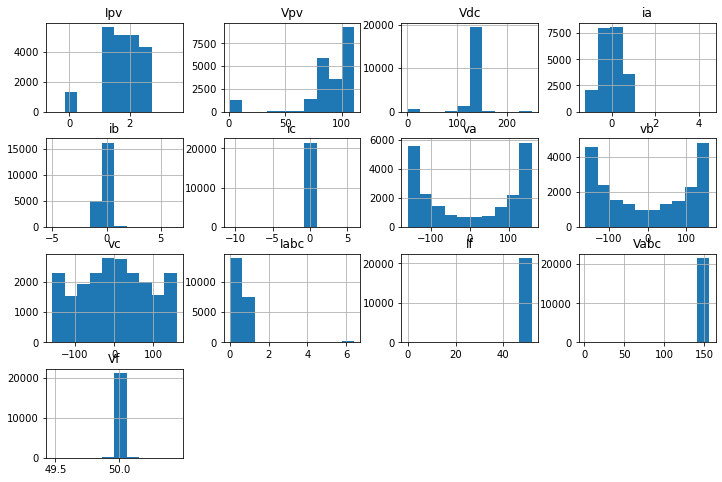

In [17]:
#univariate
#histogram
Fault_Data_Final.hist(bins = 10, figsize = (12,8))
plt.show

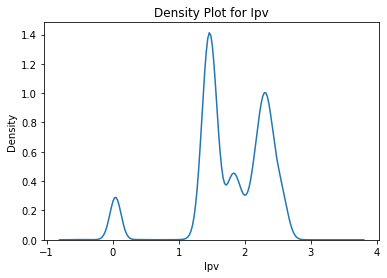

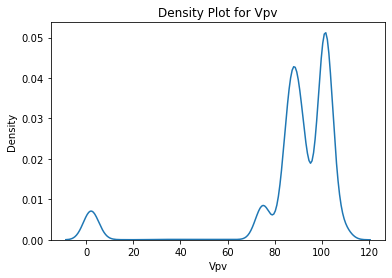

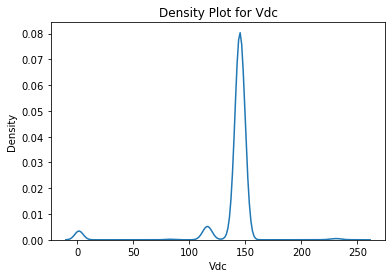

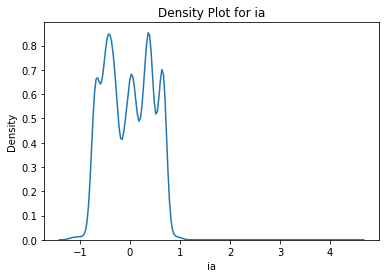

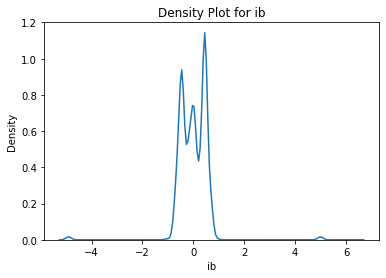

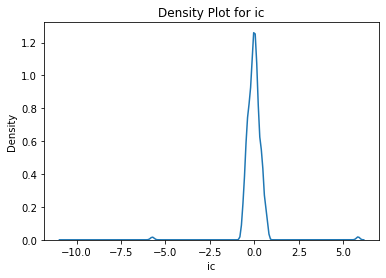

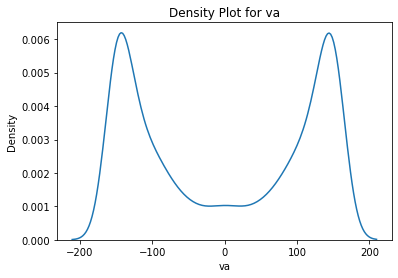

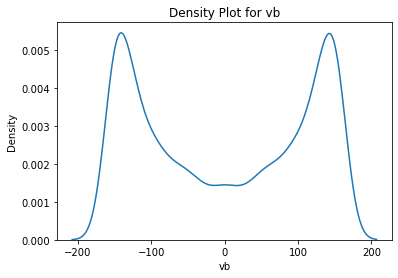

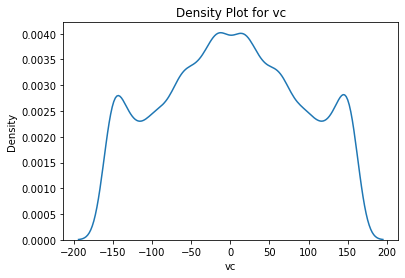

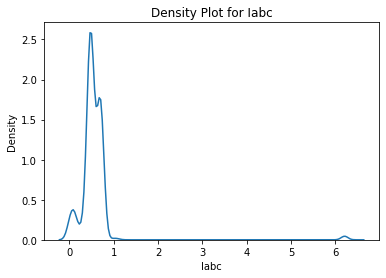

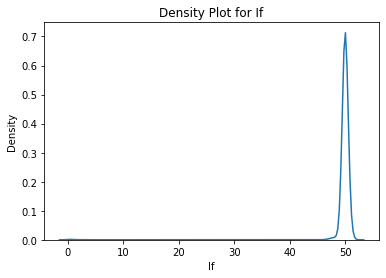

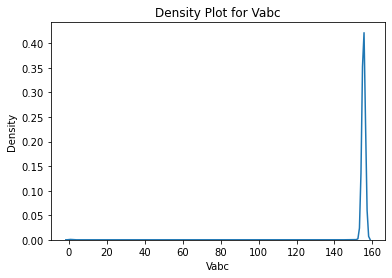

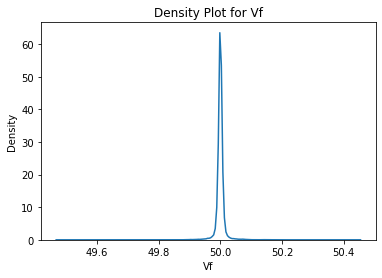

In [18]:
#bivariate analysis
l = ['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf']
for i in l:
    sns.kdeplot(Fault_Data_Final[i])
    plt.title('Density Plot for '+ str(i))
    plt.show()

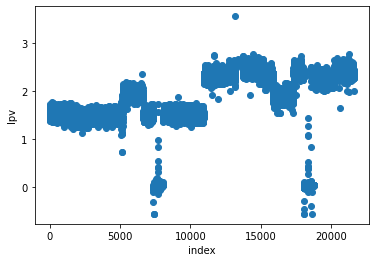

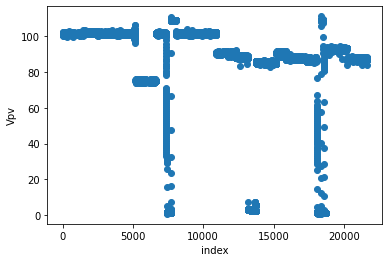

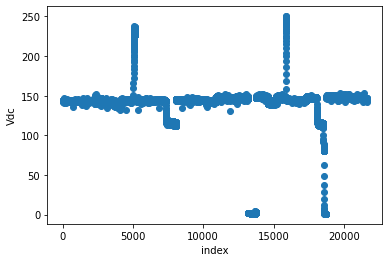

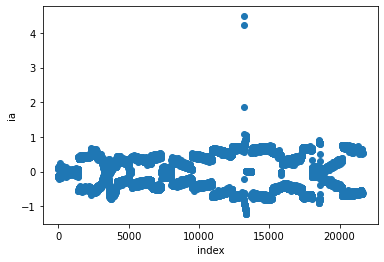

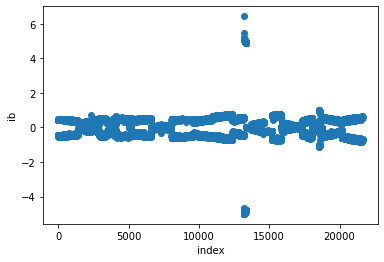

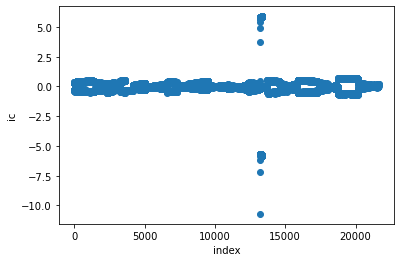

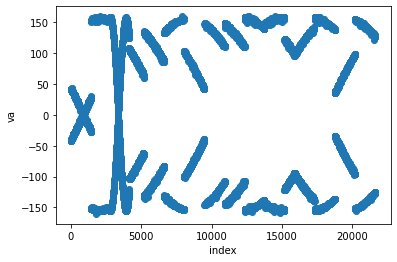

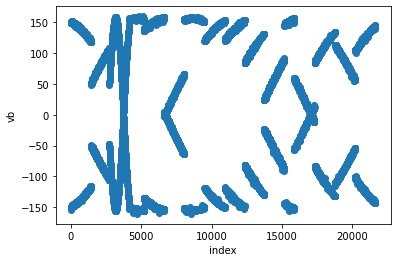

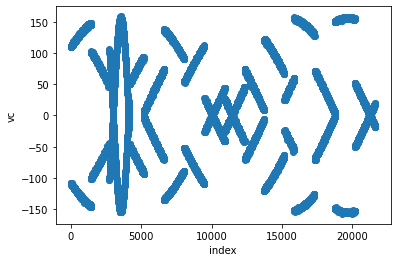

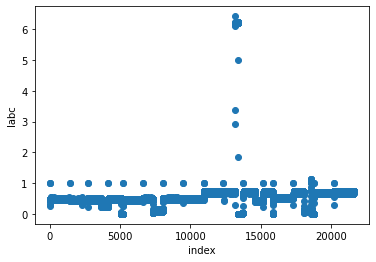

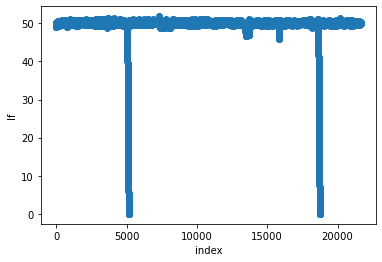

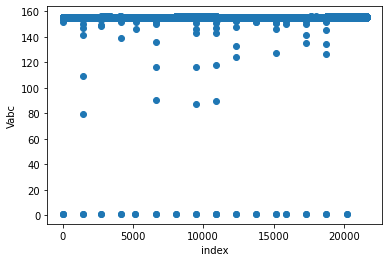

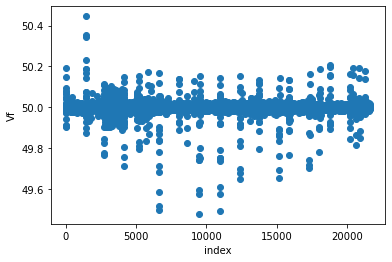

In [19]:
#Scatter plot
for col in Fault_Data_Final.iloc[:, :-1].columns:
    plt.scatter(Fault_Data_Final.index, Fault_Data_Final[col])
    plt.xlabel('index')
    plt.ylabel(col)
    plt.show()

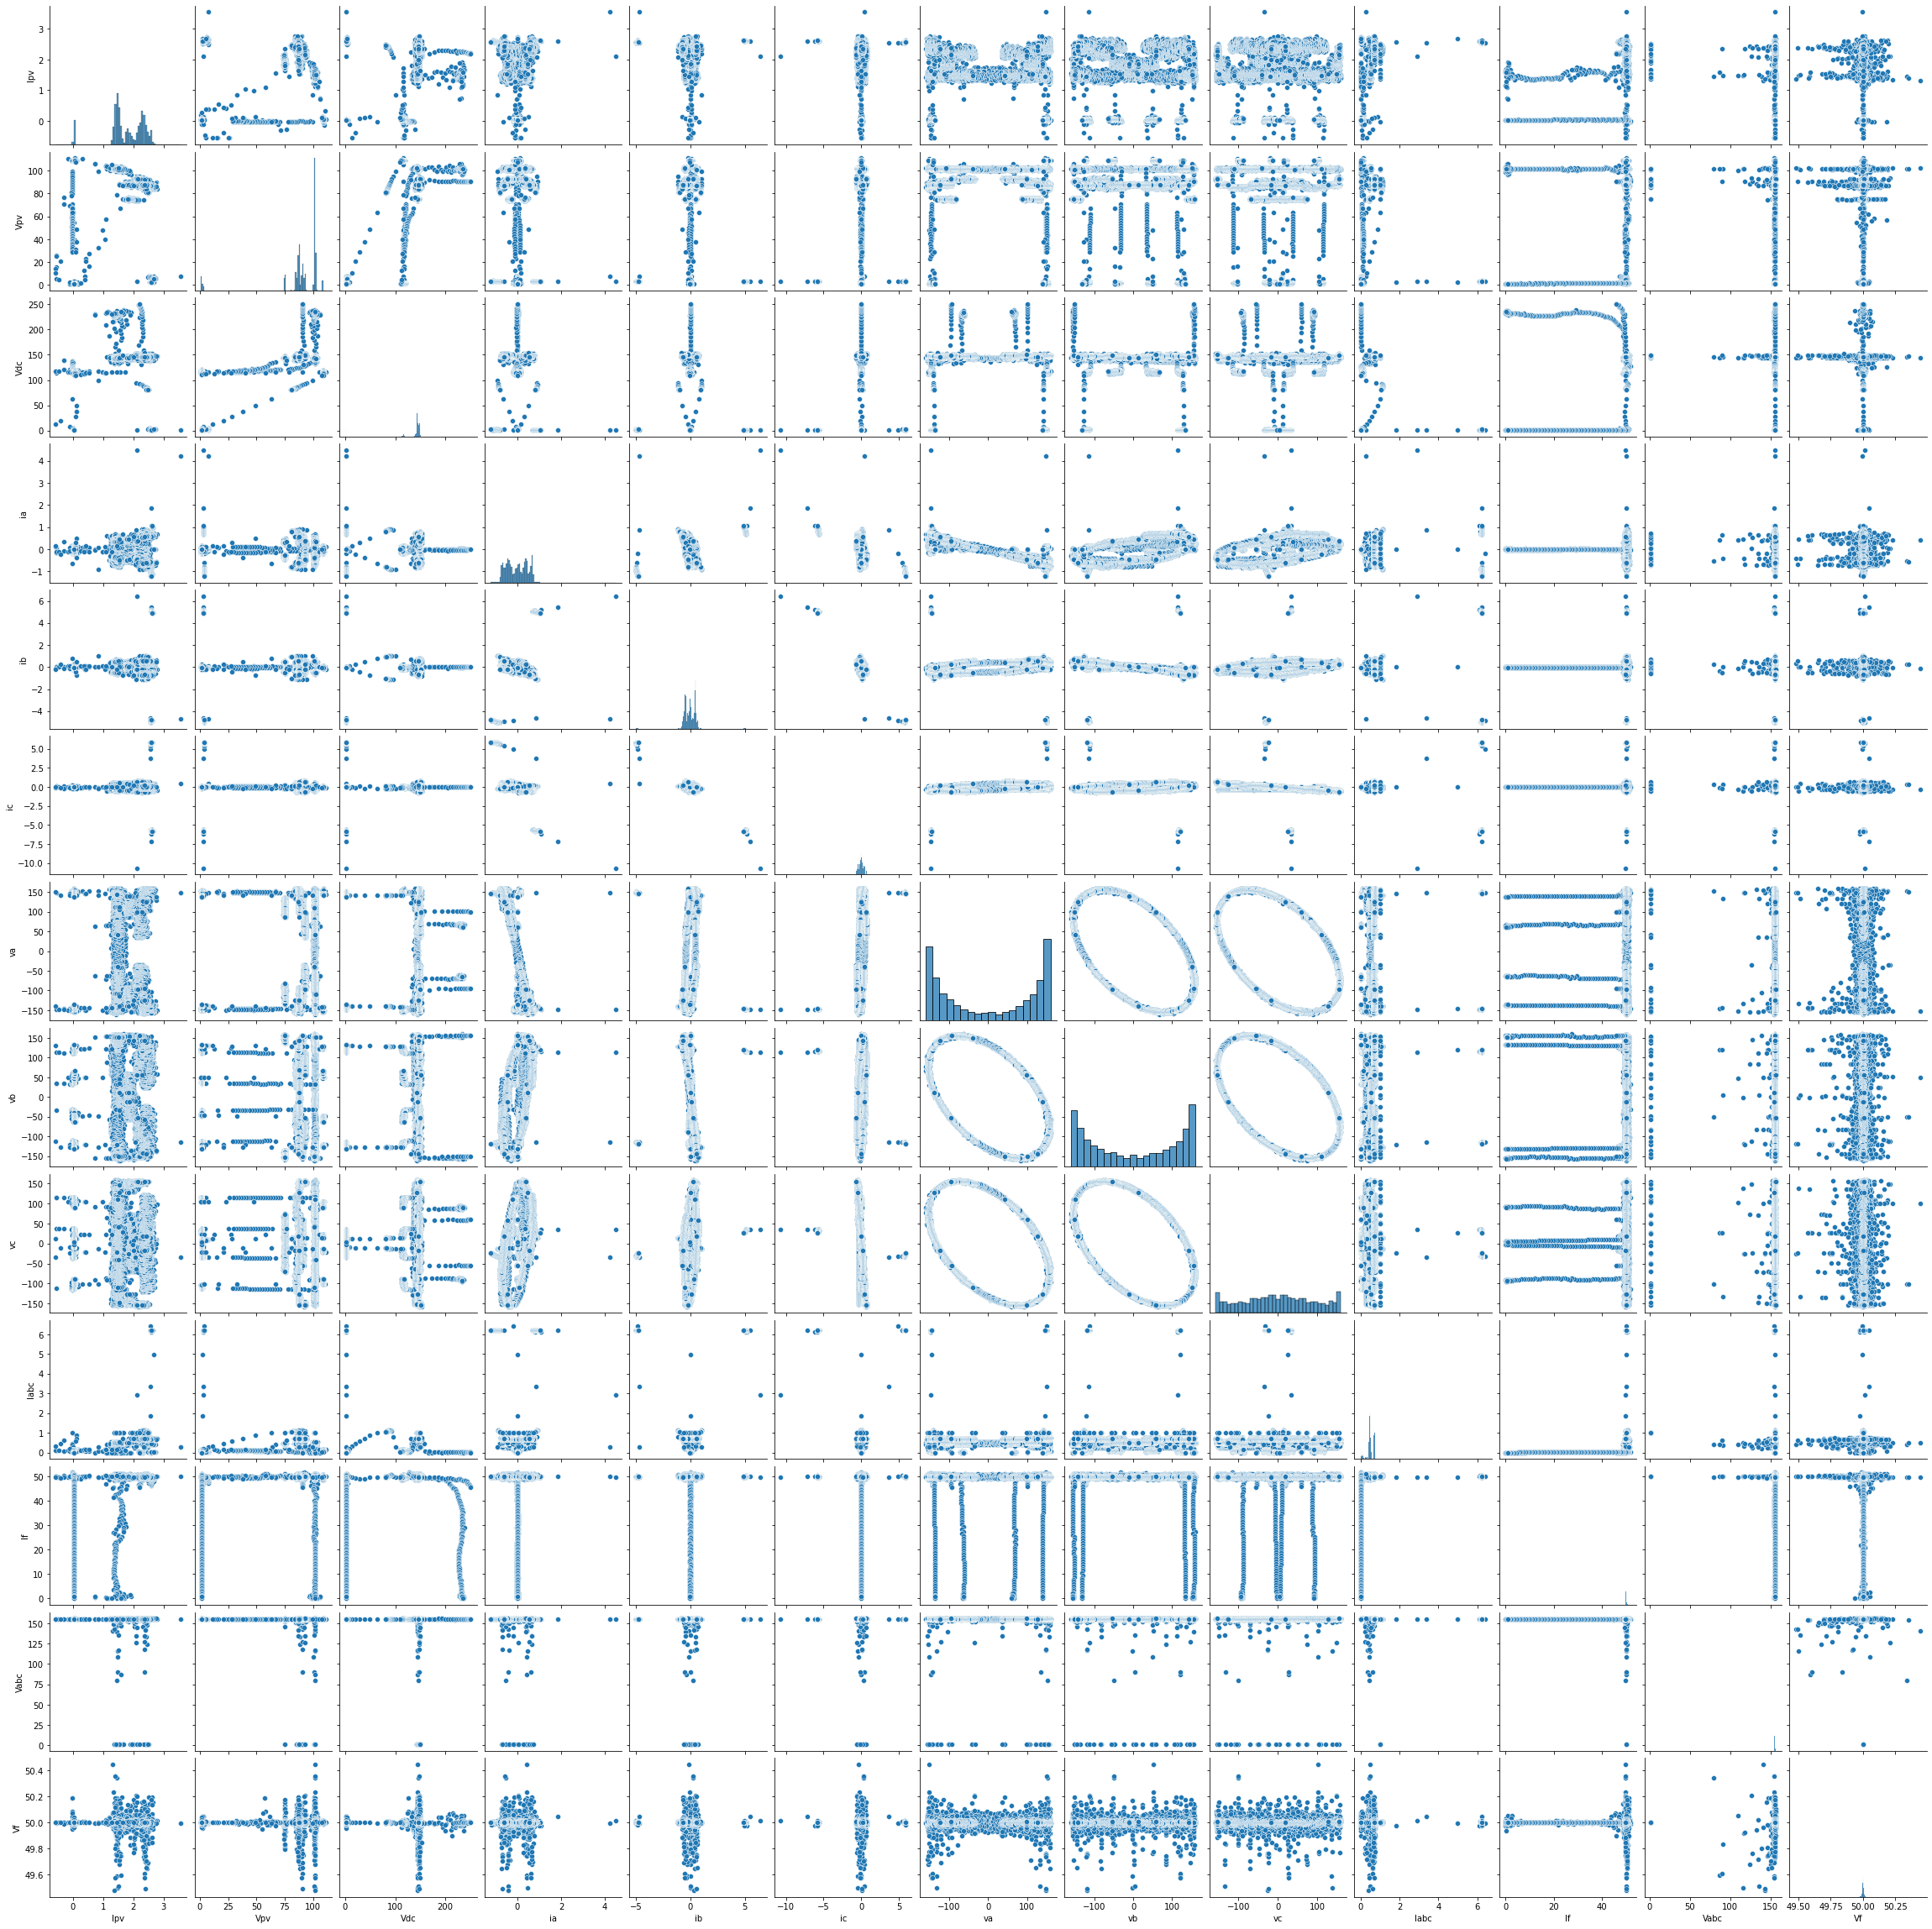

In [20]:
#multivariate
sns.pairplot(Fault_Data_Final)
plt.show()

<AxesSubplot:>

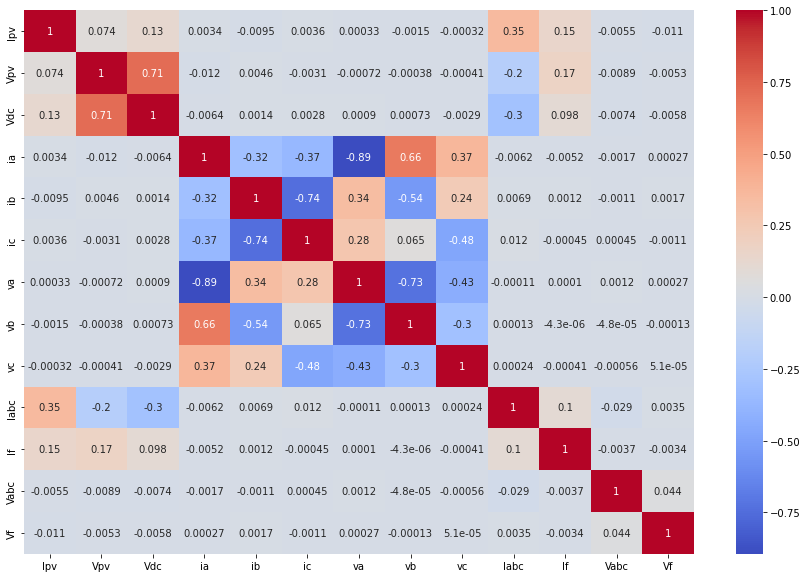

In [21]:
# heatmap

plt.figure(figsize=(15,10))
sns.heatmap(Fault_Data_Final.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:ylabel='Fault_type'>

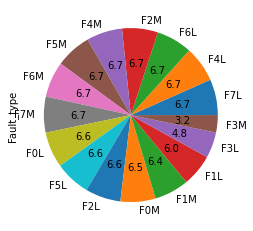

In [22]:
# Univariate Plot
# Pie chart to check the ratio of data 

Fault_Data_Final["Fault_type"].value_counts().plot.pie(autopct = '%.1f')

# Auto EDA using Sweetviz

Auto EDA is an approach to automate the Exploratory Data Analysis process. It involves using machine learning algorithms and libraries to perform the data analysis steps automatically, without human intervention. Auto EDA algorithms analyze the data and generate insights, plots, and other outputs that would typically be produced by a human analyst. The goal of auto EDA is to make the data analysis process faster, more consistent, and less prone to human error.

Sweetviz is an open-source data visualization library in Python used for Exploratory Data Analysis (EDA) and creating visually appealing and informative visualizations for comparing datasets. It allows you to compare two datasets in a single report and quickly generate informative visualizations for understanding the data and identifying patterns, outliers, and relationships between features. The library provides a simple and user-friendly interface for generating high-quality visualizations without having to write a lot of code. Sweetviz is built on top of the Matplotlib library and provides various charts, graphs, and tables to represent data insights in a visually appealing way.

                                             |          | [  0%]   00:00 -> (? left)


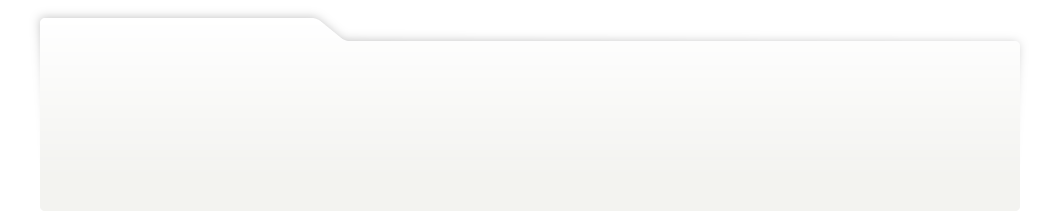
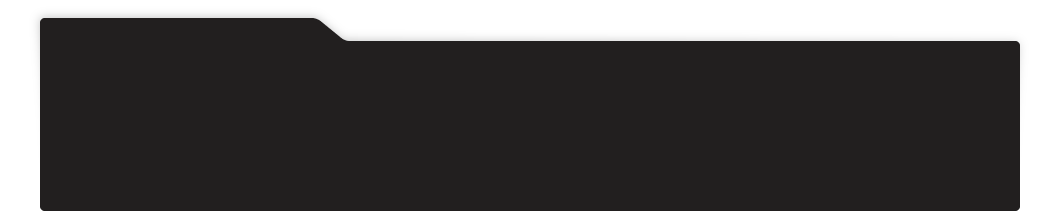
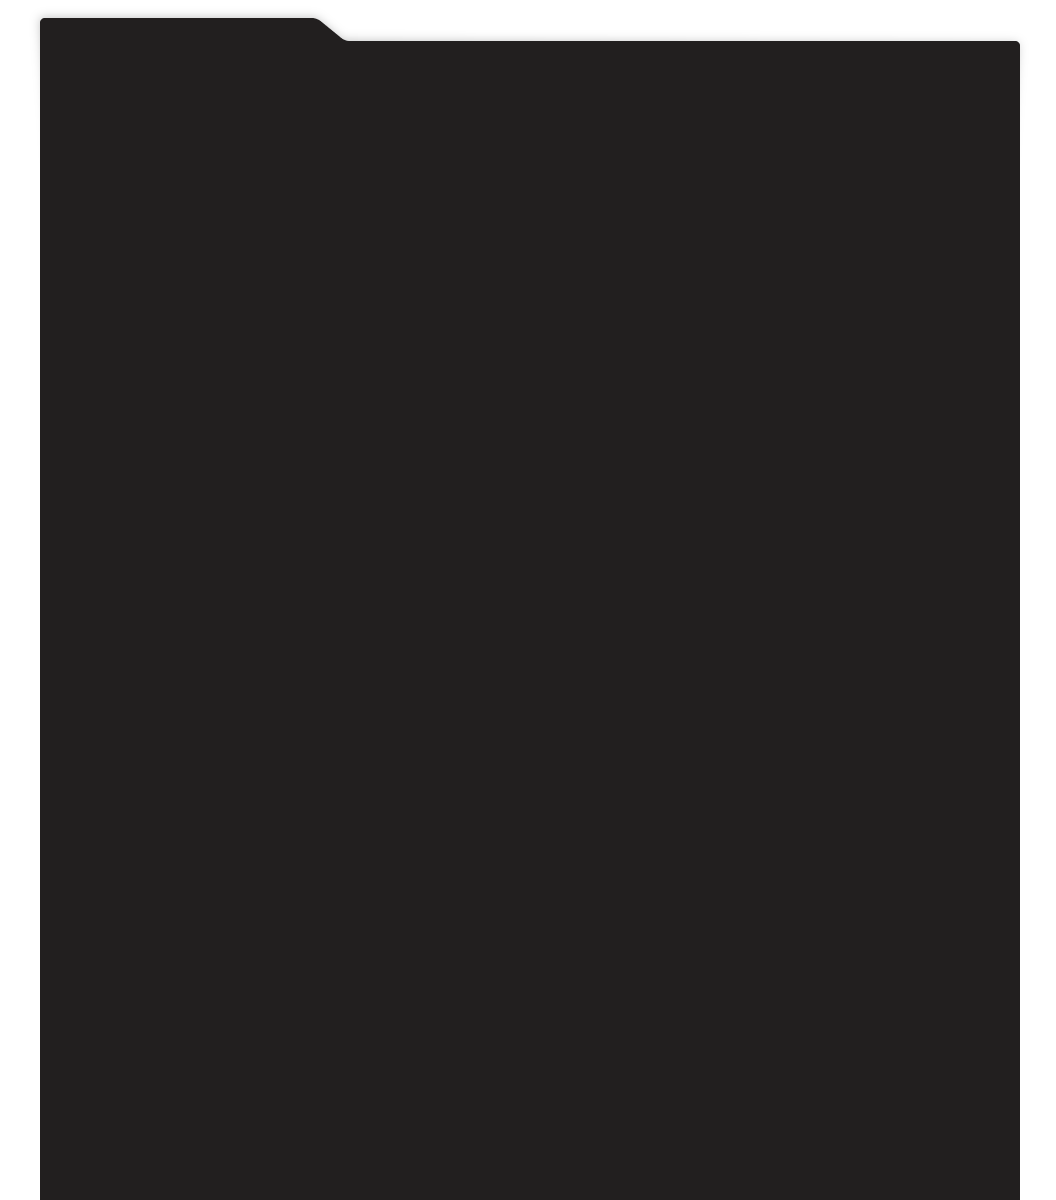
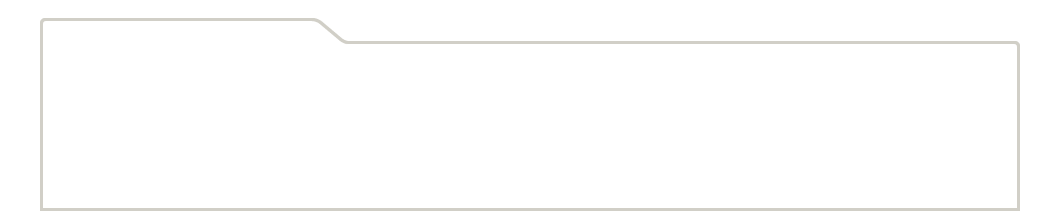
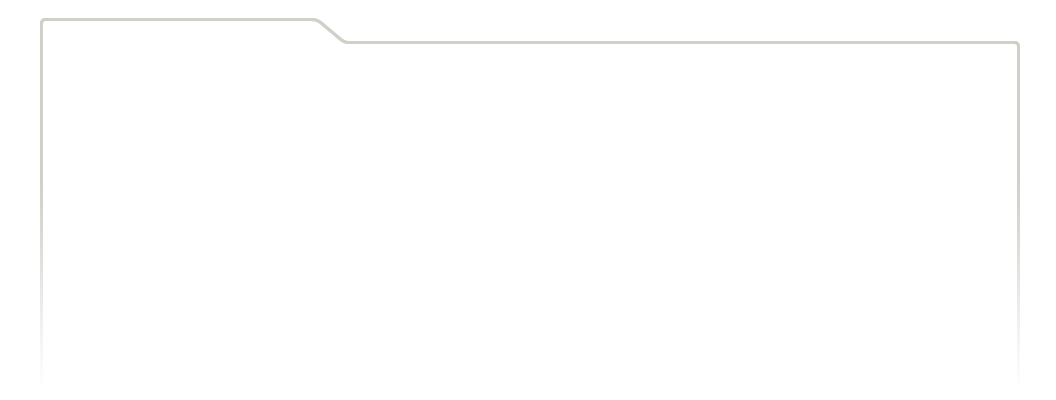
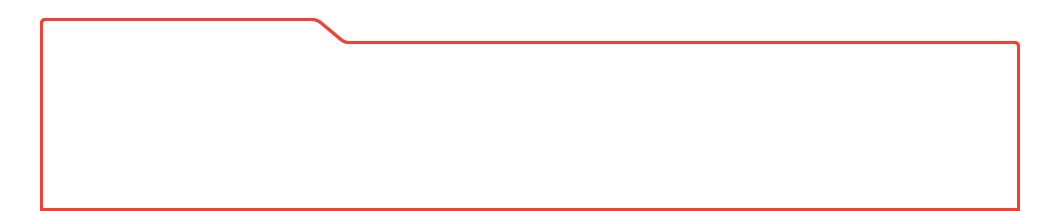
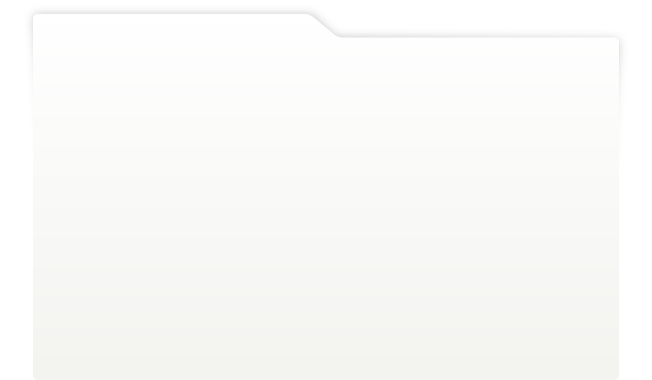
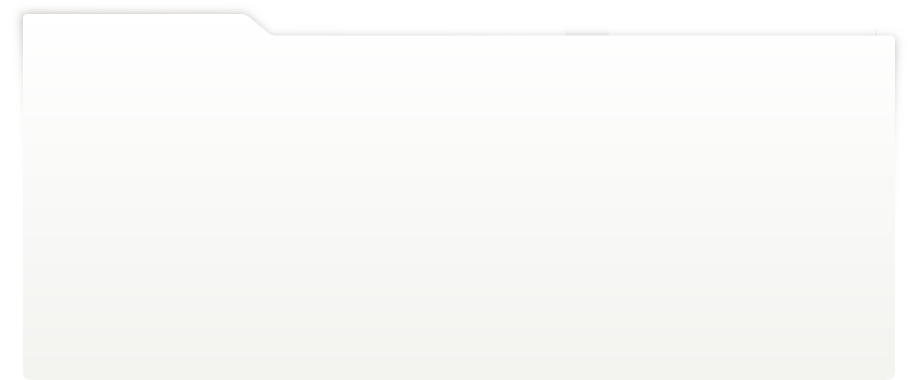
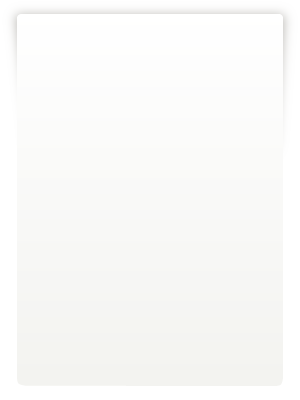
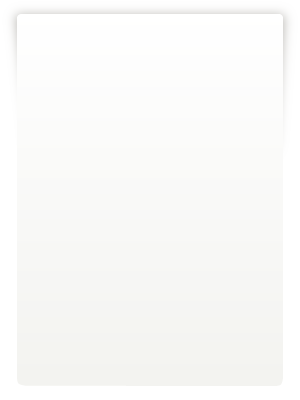
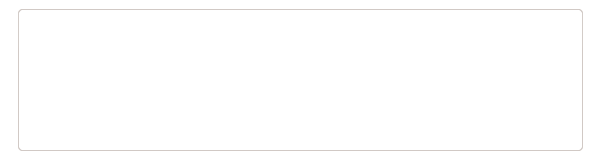
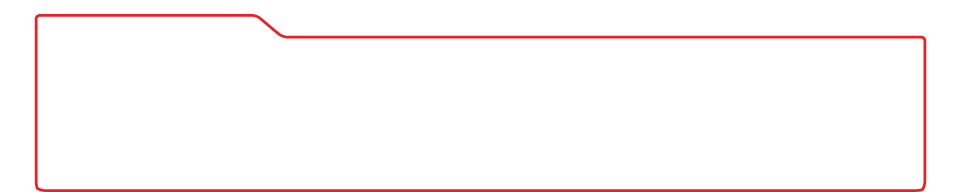
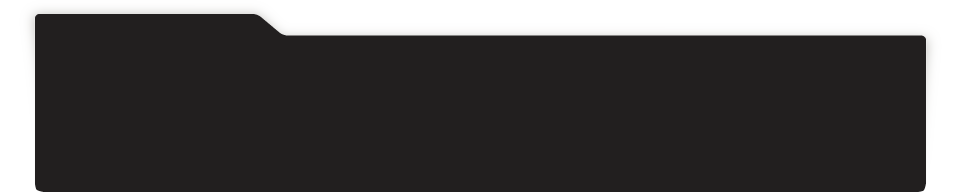
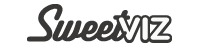
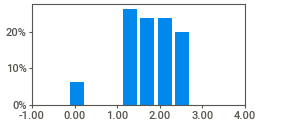
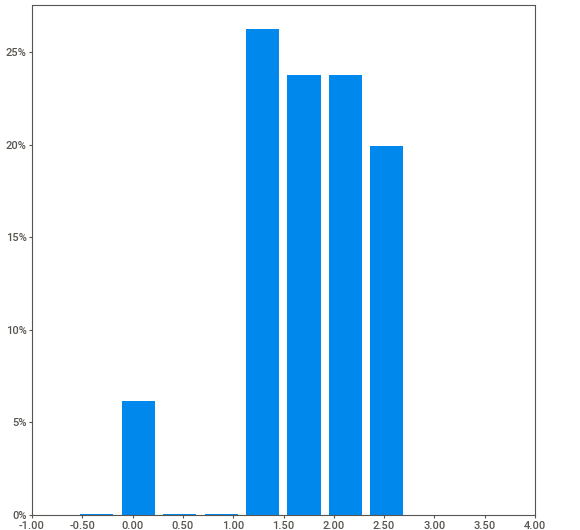
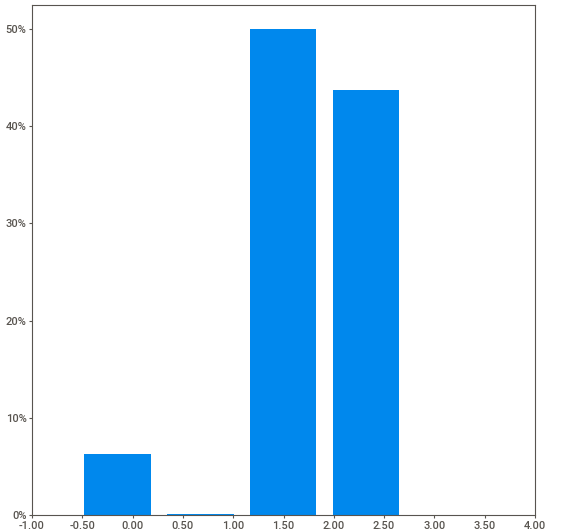
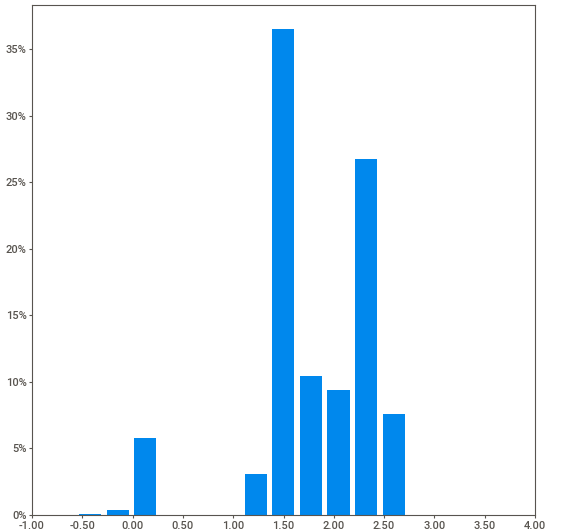
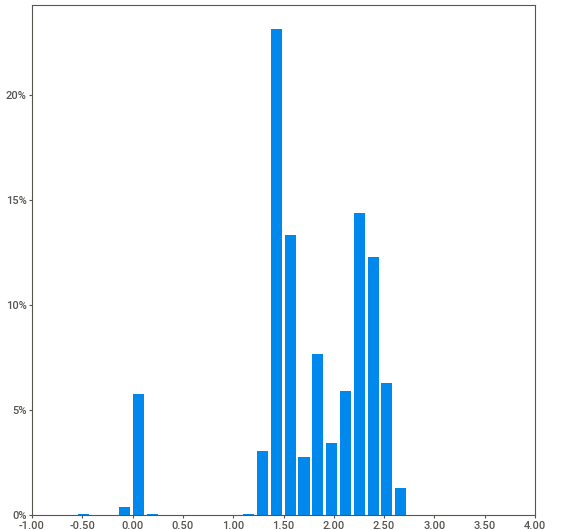
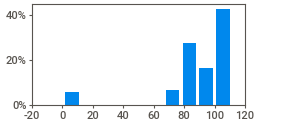
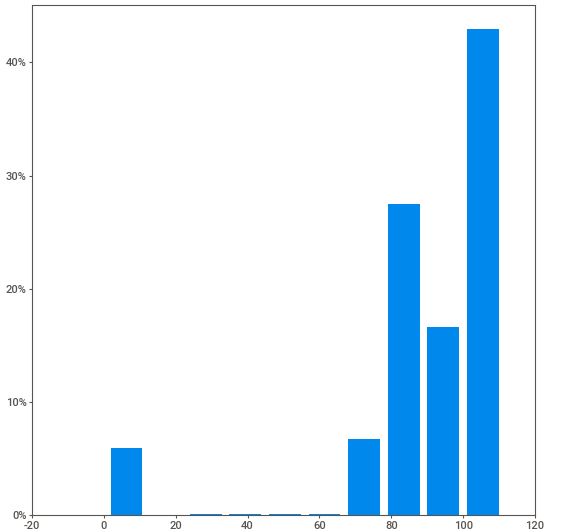
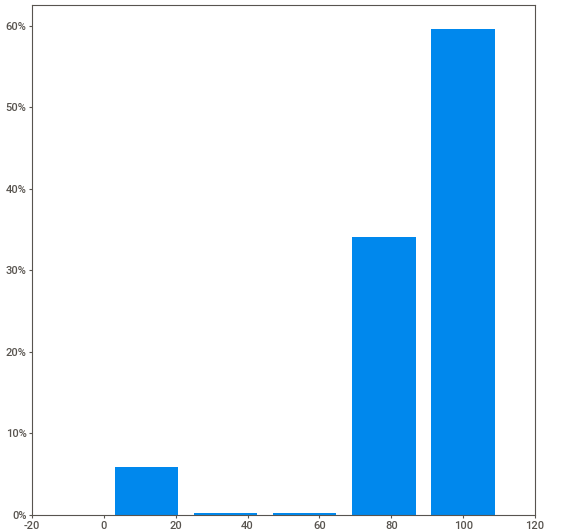
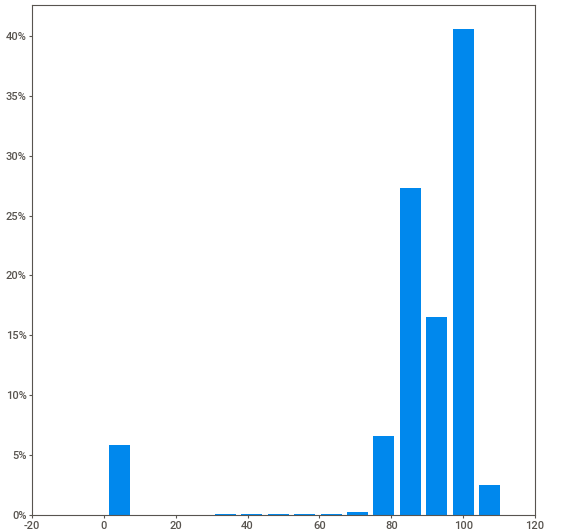
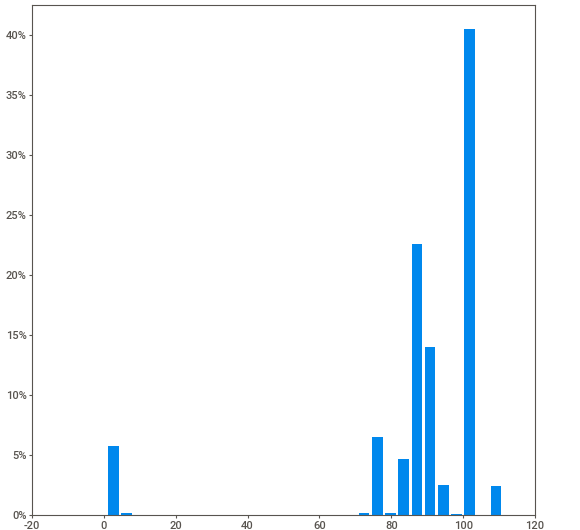
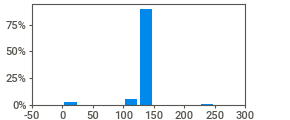
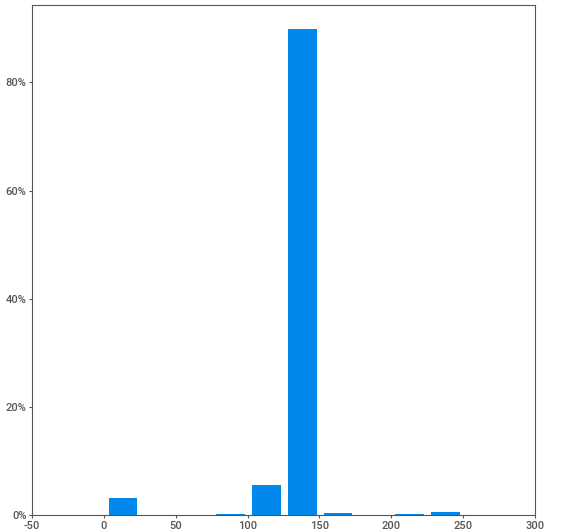
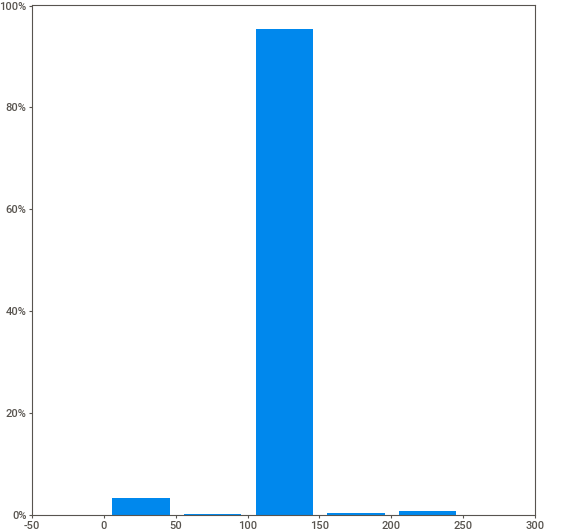
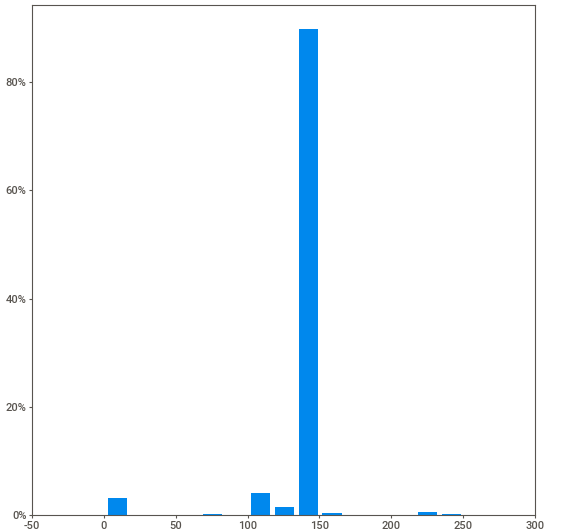
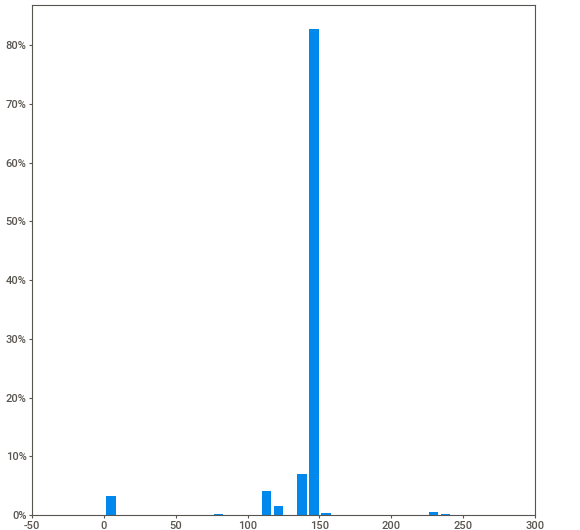
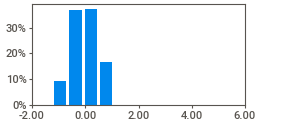
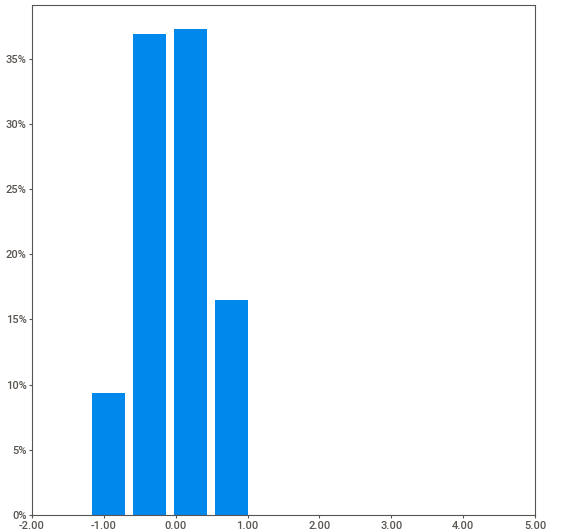
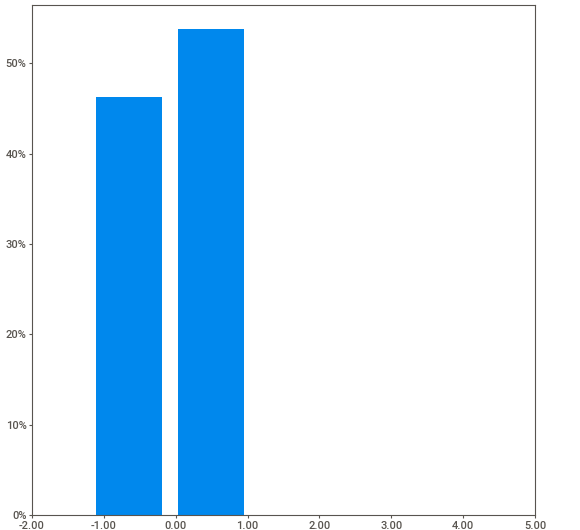
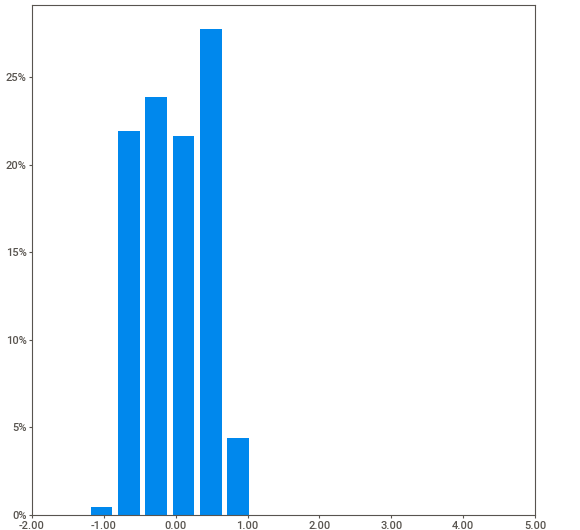
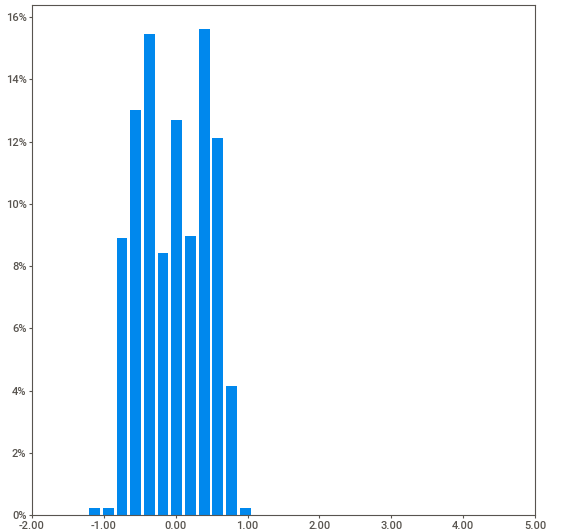
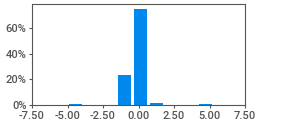
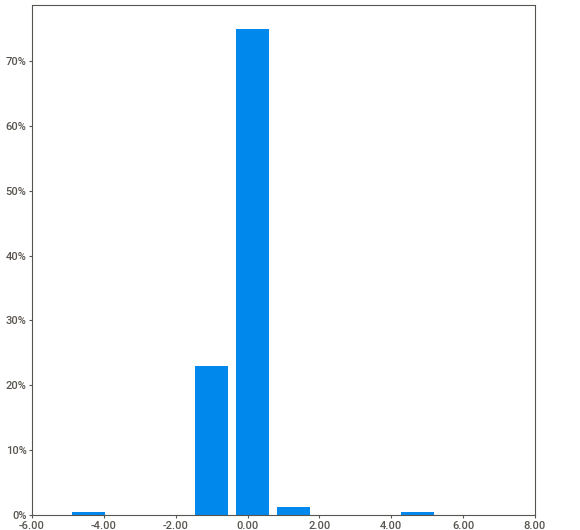
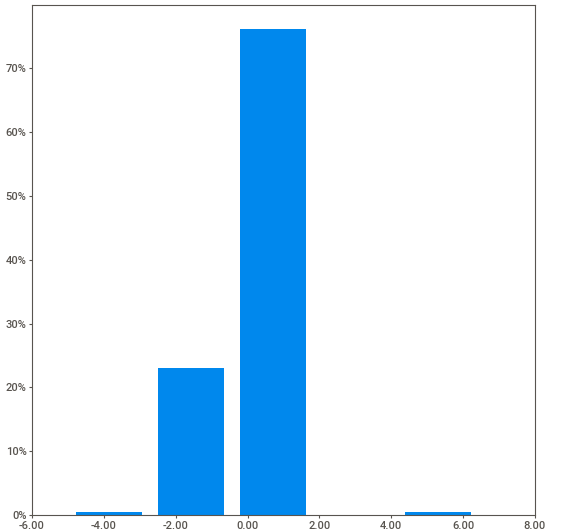
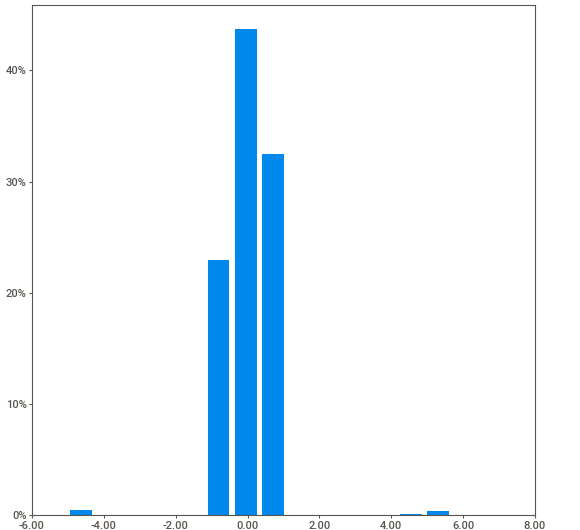
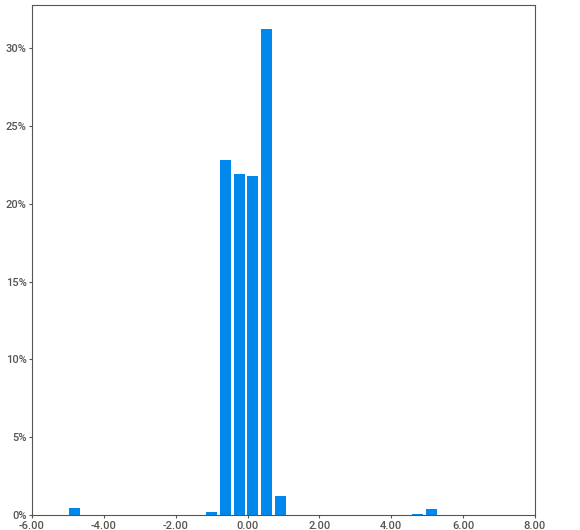
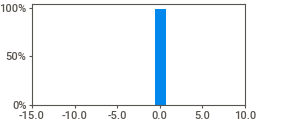
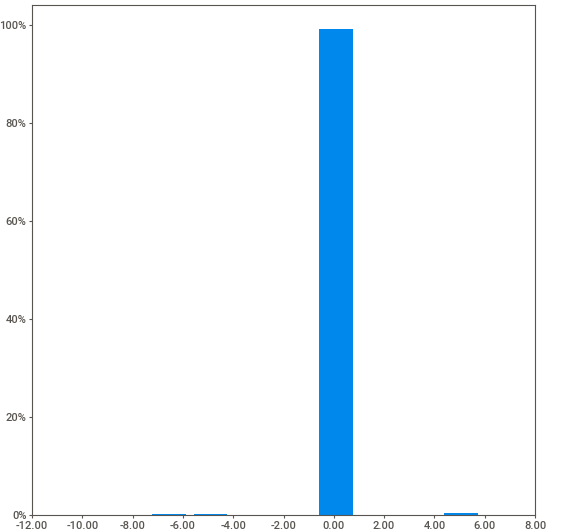
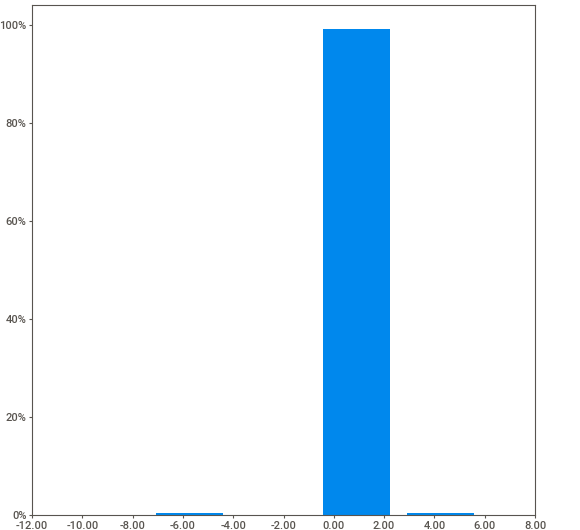
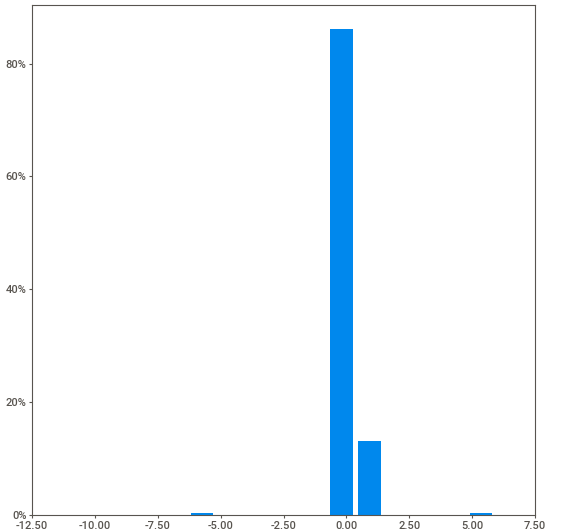
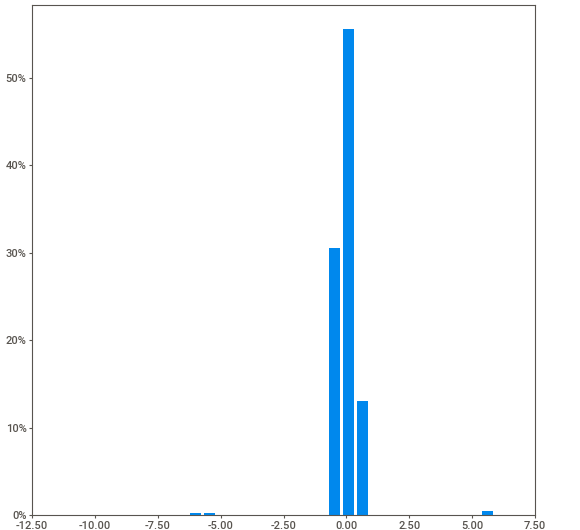
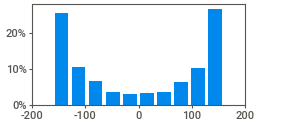
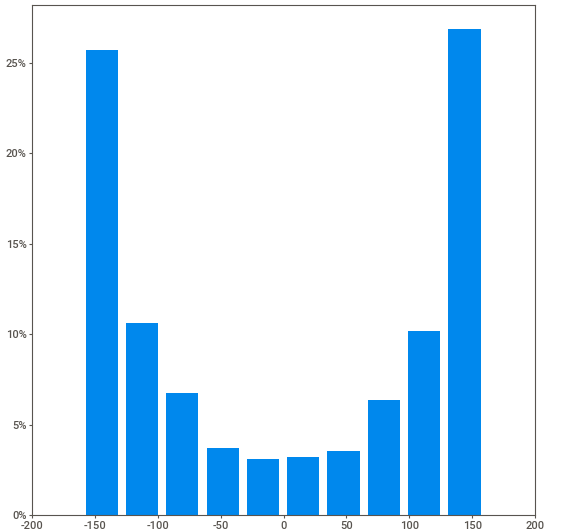
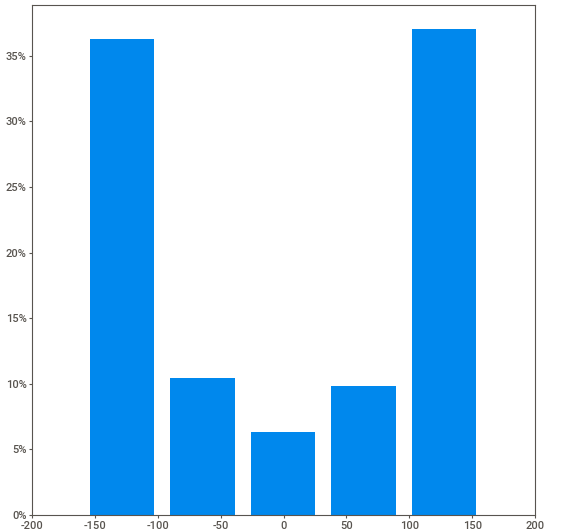
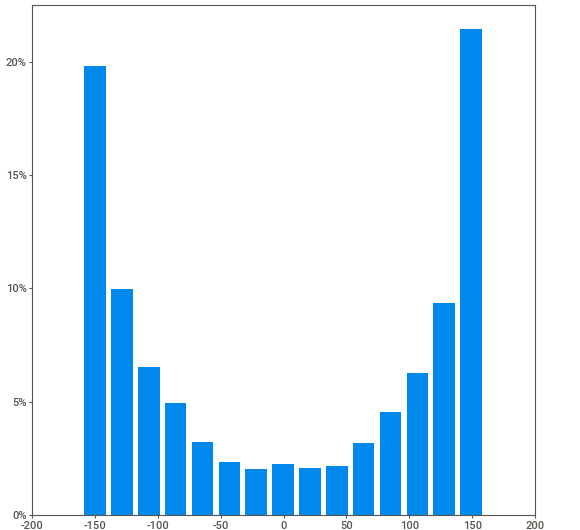
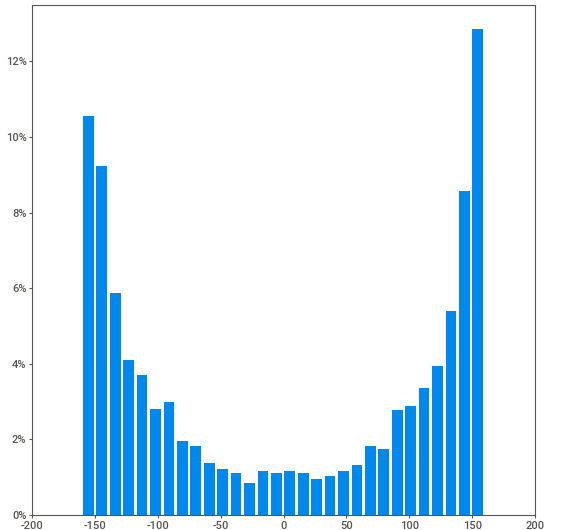
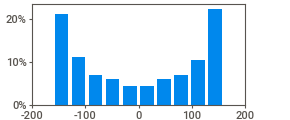
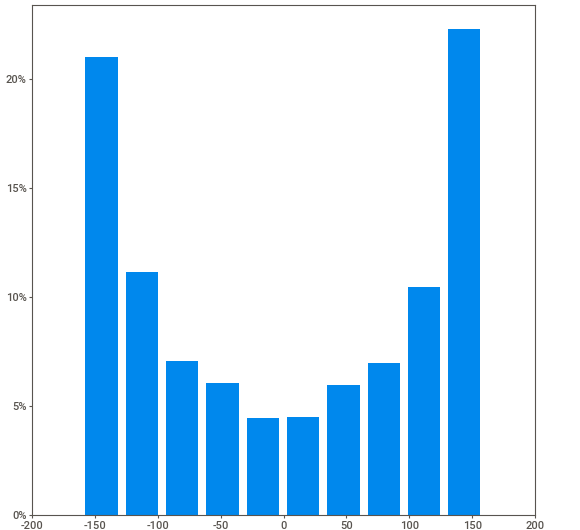
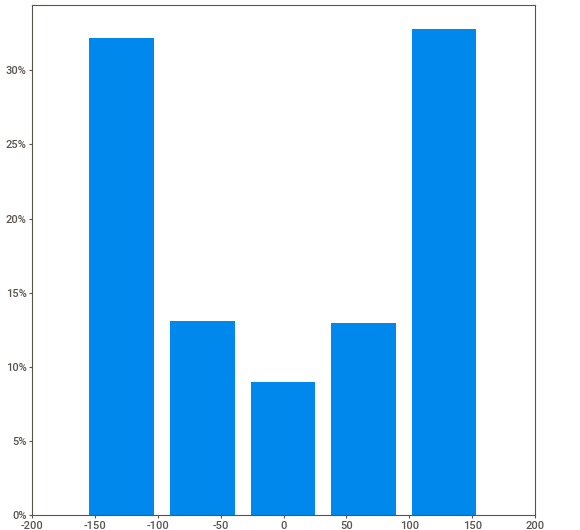
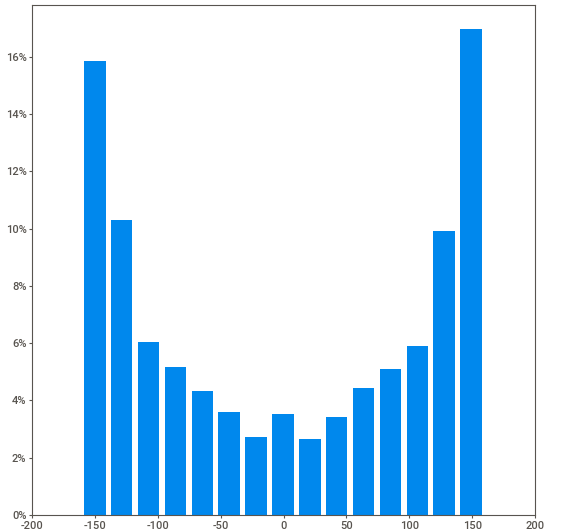
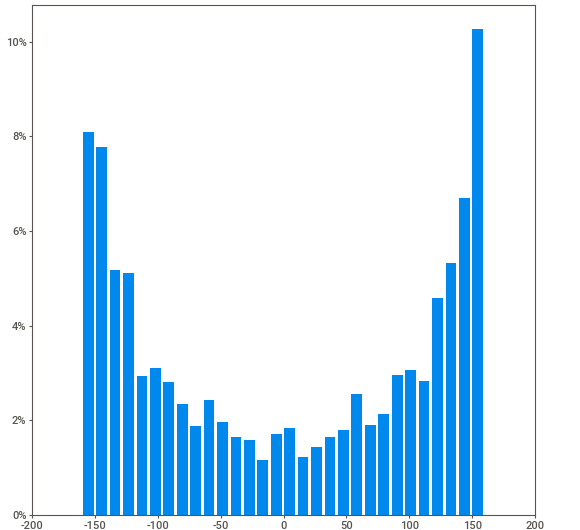
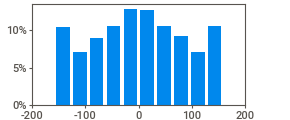
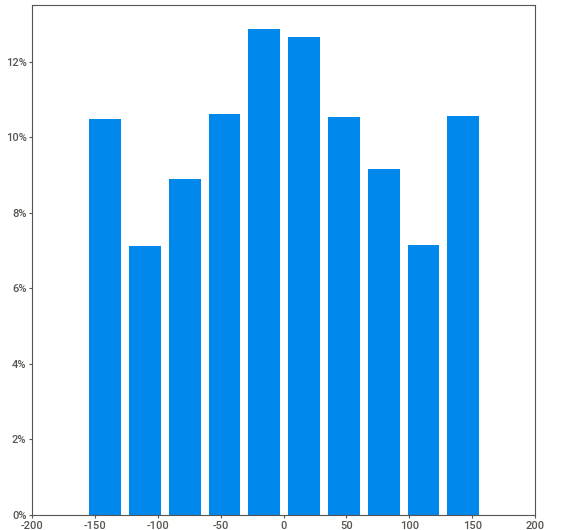
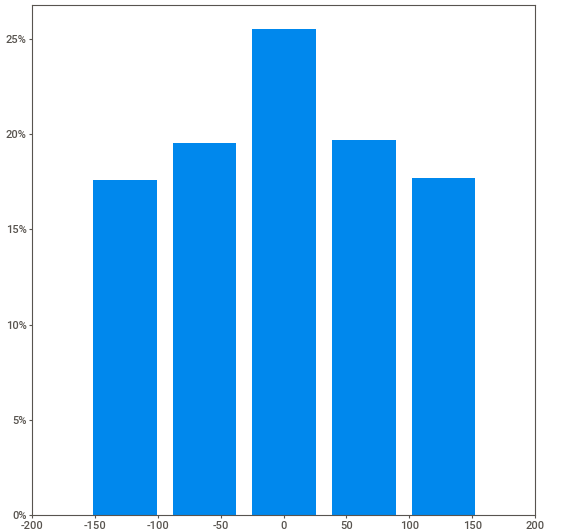
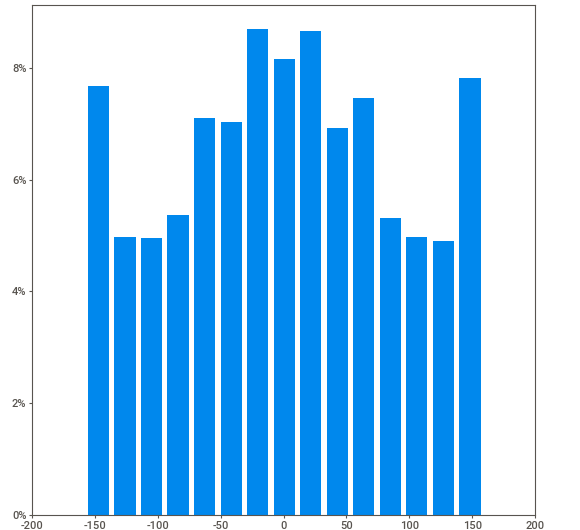
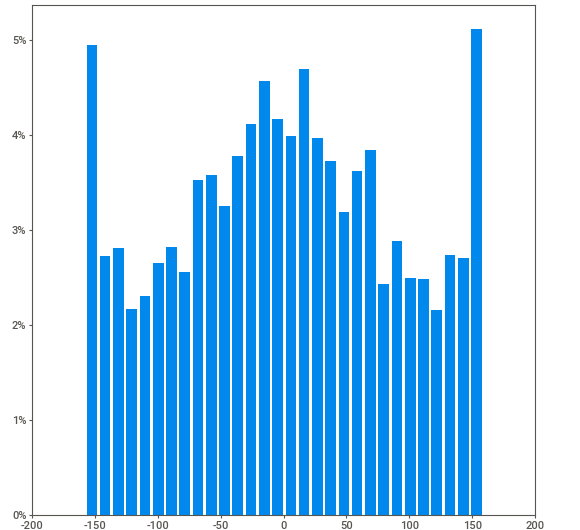
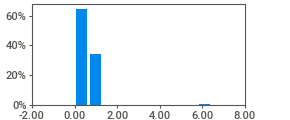
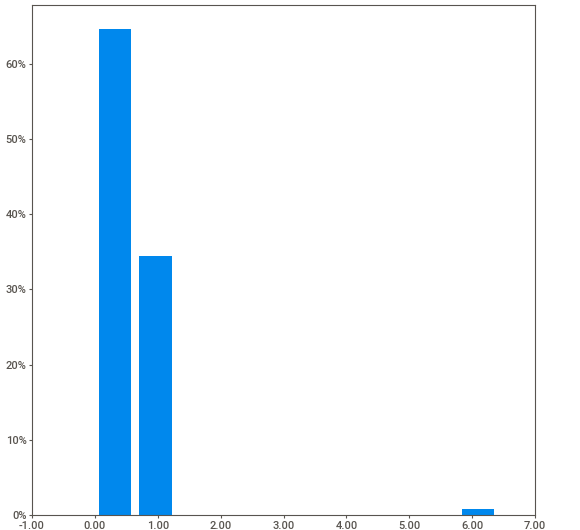
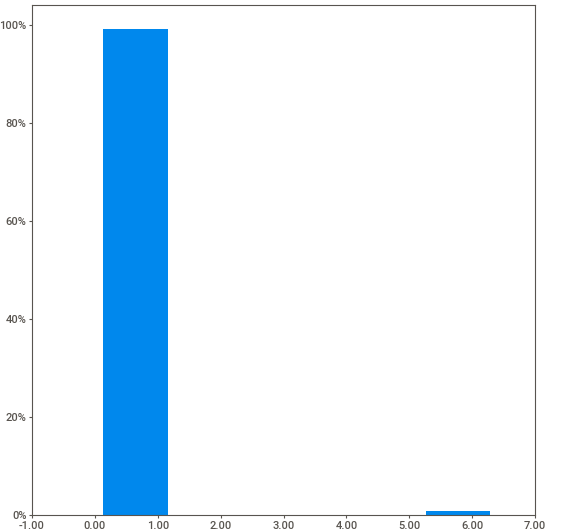
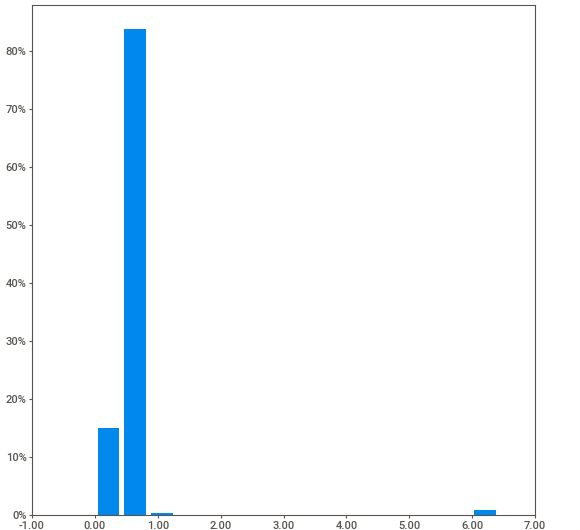
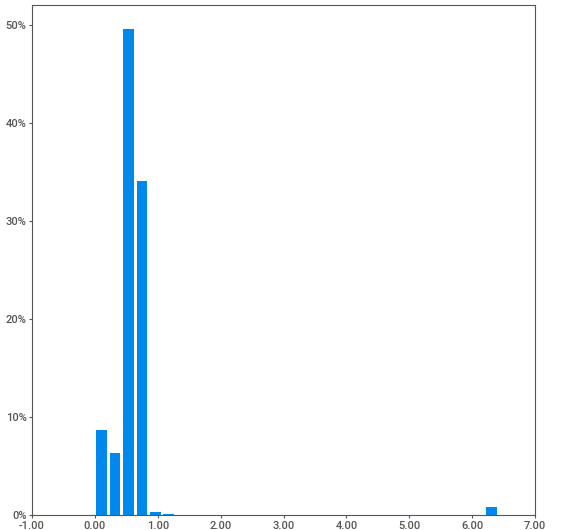
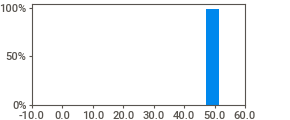
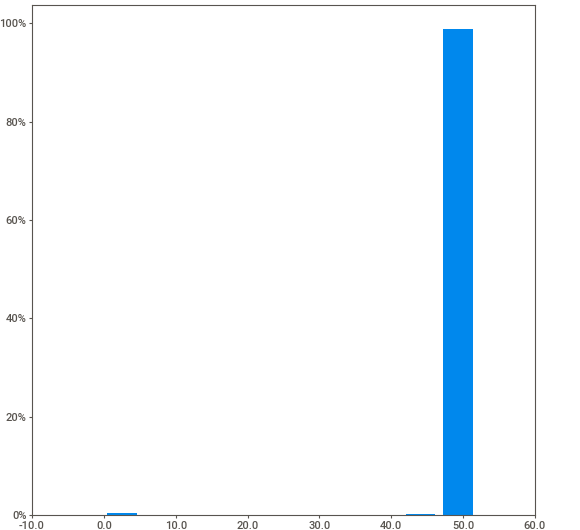
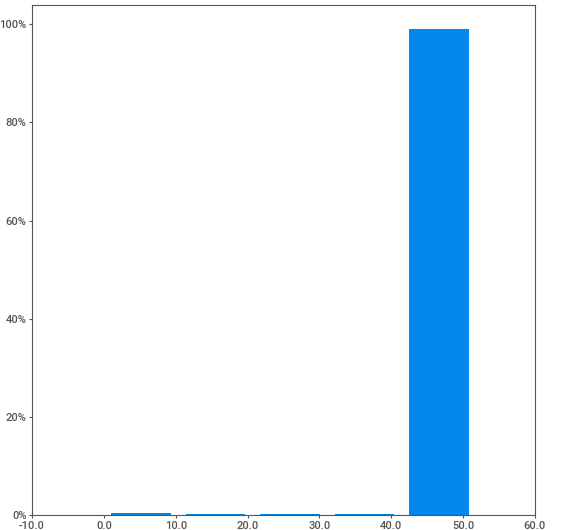
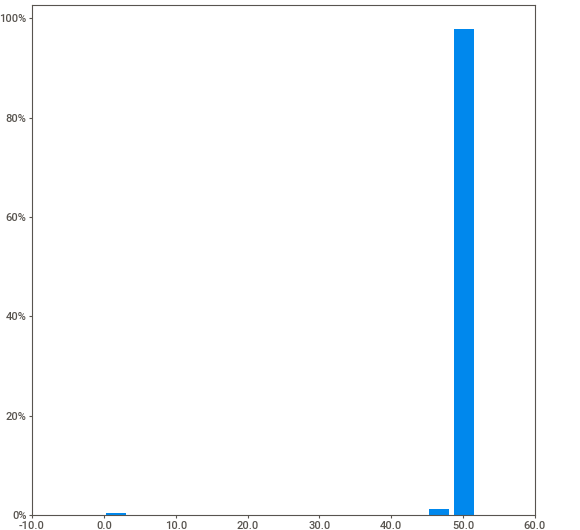
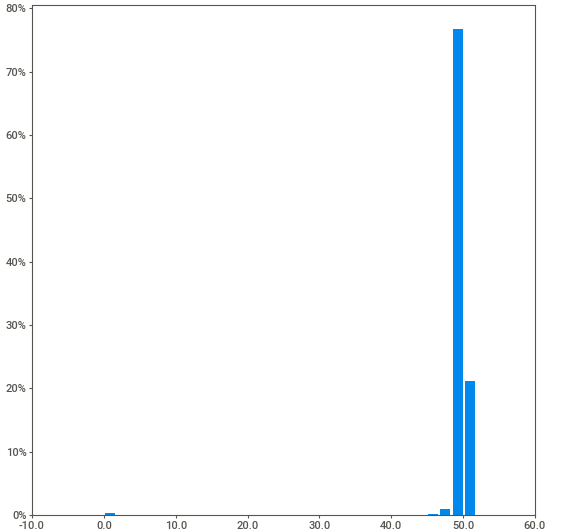
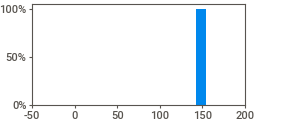
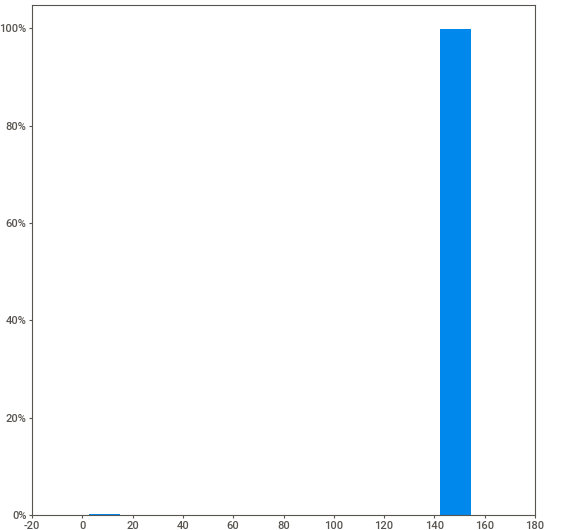
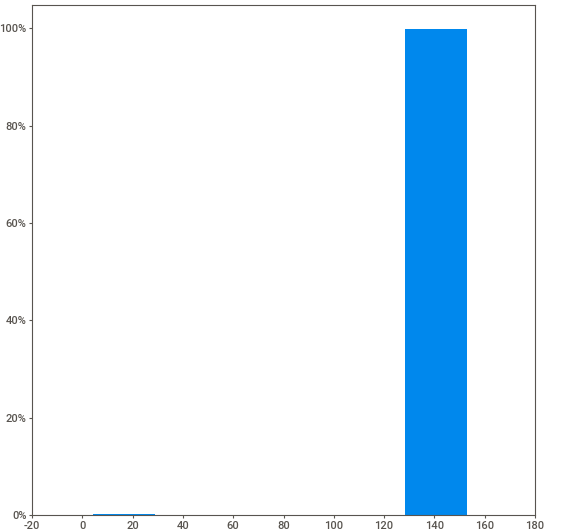
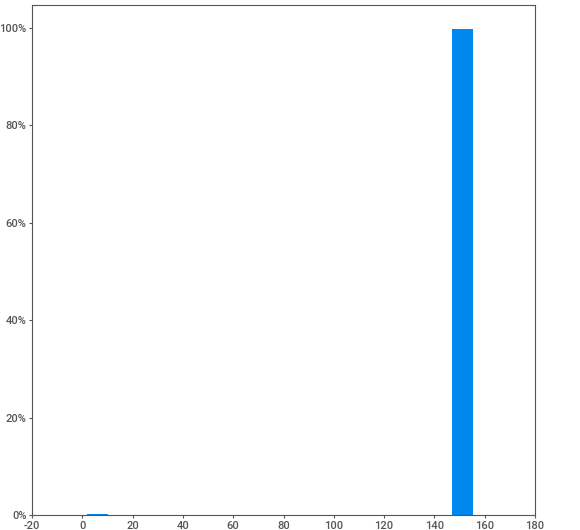
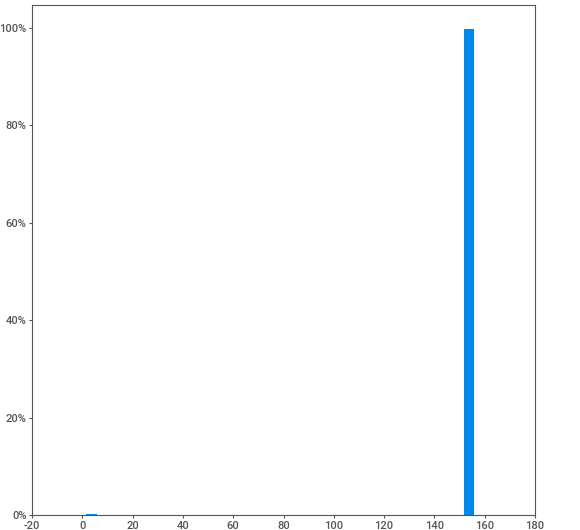
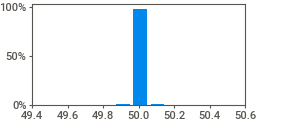
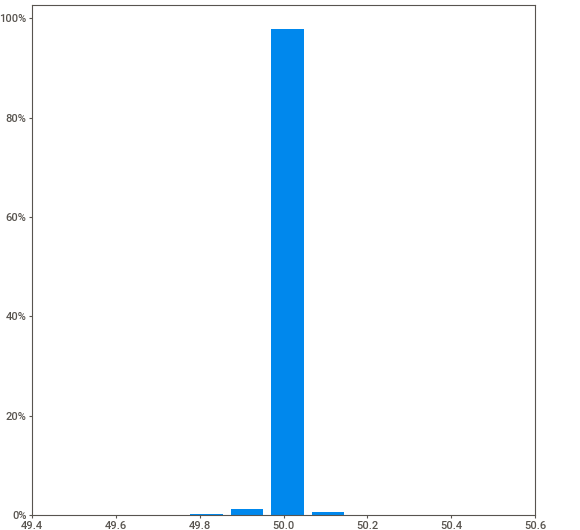
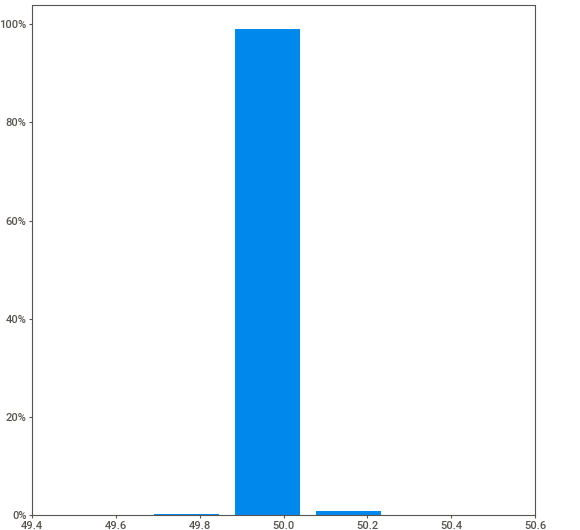
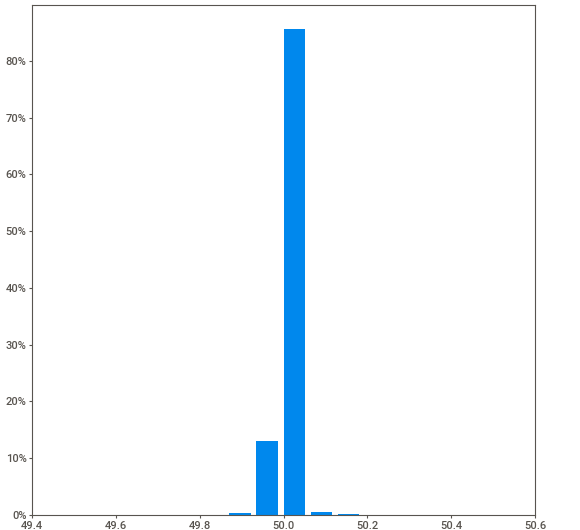
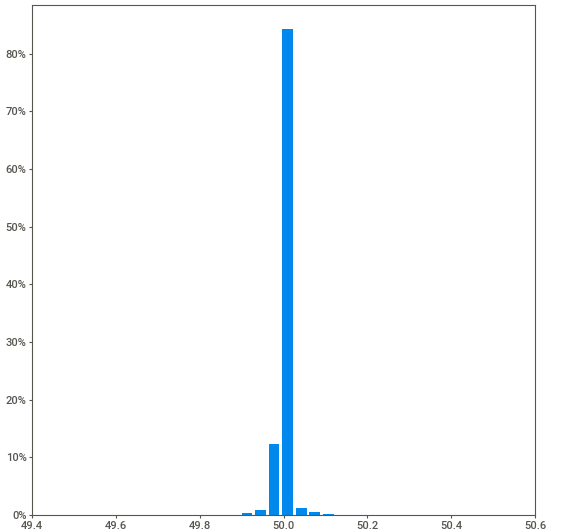
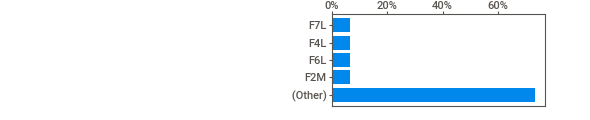
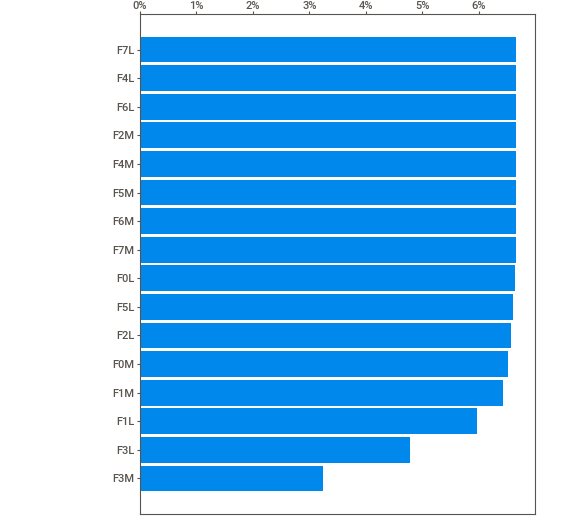
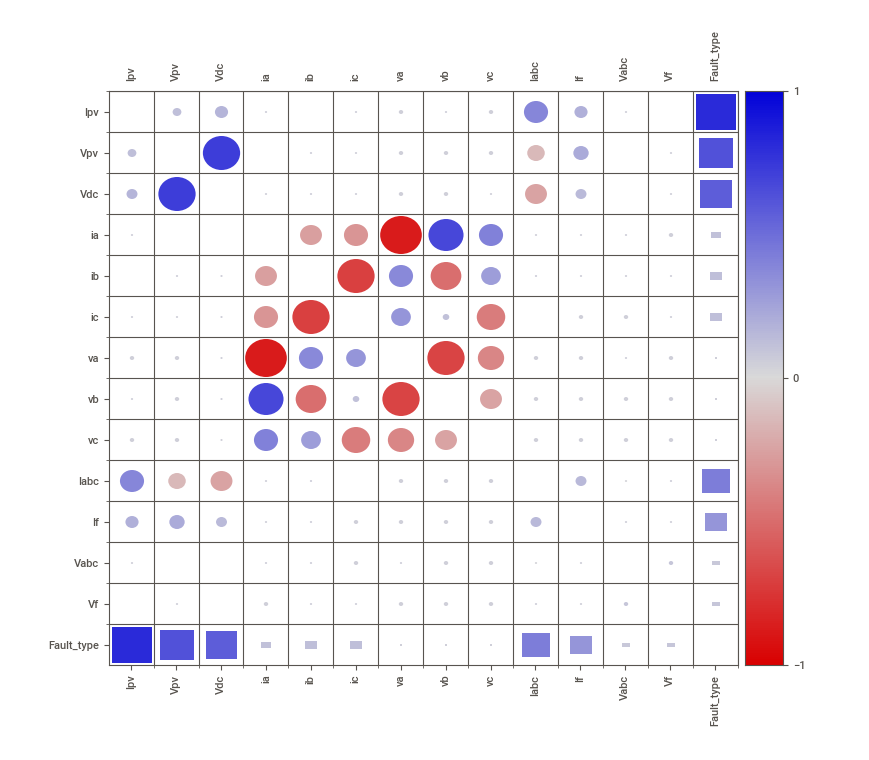
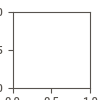

In [25]:
# Auto EDA
EDA_Fault_Data_Final = sv.analyze(Fault_Data_Final)

EDA_Fault_Data_Final.show_notebook()

In [26]:
# Target variable categories

print(Fault_Data_Final['Fault_type'].unique())

print(Fault_Data_Final['Fault_type'].value_counts())

['F0L' 'F1L' 'F2L' 'F3L' 'F4L' 'F5L' 'F6L' 'F7L' 'F0M' 'F1M' 'F2M' 'F3M'
 'F4M' 'F5M' 'F6M' 'F7M']
F7L    1441
F4L    1440
F6L    1440
F2M    1440
F4M    1440
F5M    1440
F6M    1440
F7M    1440
F0L    1438
F5L    1430
F2L    1421
F0M    1411
F1M    1390
F1L    1290
F3L    1035
F3M     700
Name: Fault_type, dtype: int64


In [27]:
# Find null values
Fault_Data.isna().sum() # No null values are there

Time          0
Ipv           0
Vpv           0
Vdc           0
ia            0
ib            0
ic            0
va            0
vb            0
vc            0
Iabc          0
If            0
Vabc          0
Vf            0
Fault_type    0
dtype: int64

In [28]:
#Handling duplicate
duplicate = Fault_Data_Final.duplicated() 
duplicate

sum(duplicate)


0

# Split data into input and output feature

In data analysis, it is often necessary to split a dataset into input features (also called independent variables or predictors) and output features (also called dependent variables or target variables).

Input features are the variables used to predict the output feature. They are the features that are input into a machine learning model to make predictions. Input features can be numerical, categorical, or text data.

Output features are the variable that we want to predict. They are the features that the machine learning model is trained to predict based on the input features. Output features can also be numerical, categorical, or text data, depending on the problem.

To split a dataset into input and output features, we typically assign the input features to one variable and the output feature to another variable.



In [8]:
# Data split into Input and Output

# Predictors(Input)
X = pd.DataFrame(Fault_Data_Final.iloc[:, :13])

# Target(Output)
Y = Fault_Data_Final.Fault_type

In [9]:
numeric_features =  X.select_dtypes(exclude=['object']).columns
numeric_features

Index(['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If',
       'Vabc', 'Vf'],
      dtype='object')

In [10]:
categorical_features = Fault_Data_Final.select_dtypes(include=['object']).columns
categorical_features

Index(['Fault_type'], dtype='object')

In [11]:
impute_pipeline = Pipeline(steps = [('Impute', SimpleImputer(strategy = 'median'))])
preprocessor = ColumnTransformer(transformers = [('num', impute_pipeline, numeric_features)])
imputation = preprocessor.fit(X)

In [33]:
#### Save the imputation model using joblib

joblib.dump(imputation, 'Imputed_Data')


['Imputed_Data']

In [12]:
num_data = pd.DataFrame(imputation.transform(X), columns = numeric_features)

num_data

Ipv         Vpv         Vdc        ia        ib        ic  \
0      1.572327  101.348877  144.140625 -0.135133  0.490112 -0.354985   
1      1.539215  101.251221  143.261719  0.086425 -0.490112  0.349971   
2      1.637604  101.031494  143.554688 -0.155274  0.469971 -0.307988   
3      1.577057  101.287842  142.968750  0.106566 -0.456543  0.336543   
4      1.613007  101.049805  143.847656 -0.155274  0.456543 -0.314702   
...         ...         ...         ...       ...       ...       ...   
21631  2.363220   87.280273  145.019531  0.542968 -0.718384  0.161982   
21632  2.308350   86.737061  145.312500 -0.631959  0.590820 -0.005864   
21633  2.341461   87.103271  145.312500  0.536254 -0.711670  0.168696   
21634  2.426605   87.011719  145.312500 -0.625245  0.584106  0.000850   
21635  2.352814   87.225342  145.312500  0.549682 -0.691528  0.168696   

               va          vb          vc      Iabc         If        Vabc  \
0       41.744537 -149.872894  109.064585  1.000000  50.000000    1.000000   
1      -42.311096  149.029083 -108.377482  1.000000  50.000000    1.000000   
2       41.515503 -149.933167  109.104767  1.000000  50.000000    1.000000   
3      -42.106171  150.222473 -109.249420  0.461228  49.921509  151.655756   
4       41.370850 -150.162201  109.245402  0.311221  49.594346  154.027080   
...           ...         ...         ...       ...        ...         ...   
21631 -125.233612  143.013916  -18.270518  0.700222  49.837684  155.419819   
21632  126.101532 -142.121887   18.503571  0.696735  49.979017  155.409061   
21633 -124.751434  142.893372  -18.073629  0.692128  50.219535  155.370171   
21634  125.438538 -143.050079   18.379008  0.690443  50.113452  155.363070   
21635 -124.835815  143.013916  -17.792358  0.688933  49.903225  155.388027   

              Vf  
0      50.000000  
1      50.000000  
2      50.000000  
3      50.078264  
4      50.193078  
...          ...  
21631  49.997678  
21632  50.000249  
21633  50.000483  
21634  49.999983  
21635  50.003751  

[21636 rows x 13 columns]

# Data Preprocessing
Data preprocessing refers to the techniques and steps involved in preparing raw data into a format that can be used for further analysis or building predictive models. It is an essential step in any machine learning project as the quality and type of data can greatly affect the model's performance. The preprocessing steps typically involve the following:

1.	Data Cleaning: Removing missing values, correcting inconsistent data, and dealing with outliers.
2.	Data Transformation: Converting data into appropriate formats, such as scaling features, encoding categorical variables, and normalizing data.
3.	Data Integration: Combining multiple datasets into a single dataset to get a comprehensive view.
4.	Data Reduction: Reducing the number of features or instances by either feature selection or instance reduction techniques.
5.	Data Splitting: Dividing data into training and testing datasets for model evaluation and hyperparameter tuning.
6.	Data Augmentation: Creating additional data instances from existing data to overcome small sample sizes or imbalance.


Overall, the goal of data preprocessing is to make the data suitable for analysis, to eliminate any noise, and to make it suitable for modeling.


Here we are using imputation method and In this project we are considering "Median Imputation"

Median imputation will not be affected by outliers in the same way as mean imputation. Because median is the middle value, it is not affected by extreme values, even if they are outliers. So, in datasets with outliers, median imputation can be a better choice than mean imputation as it can provide more accurate results.

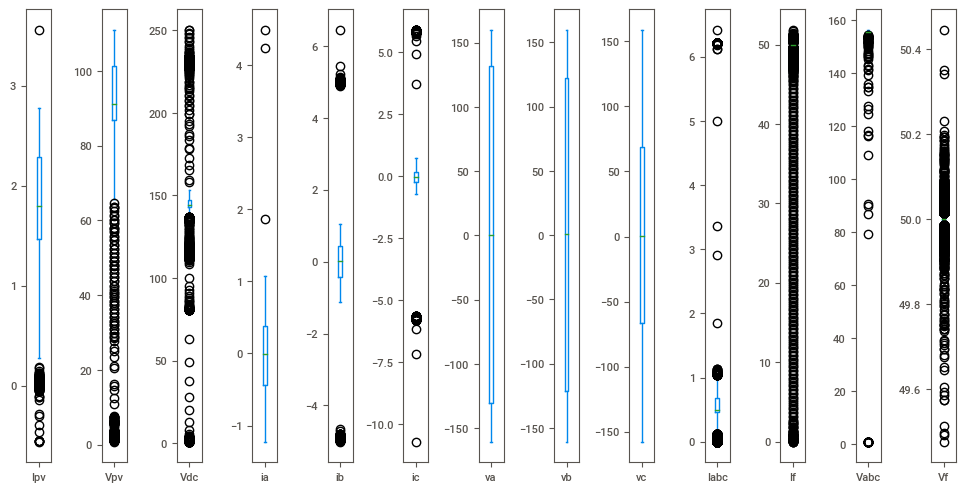

In [35]:
#OUTLIER ANALYSIS
# Multiple boxplots in a single visualization to see the outliers

Fault_Data_Final.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6)) 

# increase spacing between subplots

plt.subplots_adjust(wspace = 2.0) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [13]:
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both',  
                          fold = 1.5,
                          variables = ['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf'])


In [14]:
clean_data = winsor.fit(num_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

In [38]:
# SAVE TO PIPELINE

joblib.dump(clean_data, 'winsor')

['winsor']

In [15]:
# Fitting the treated values to the data-set

num_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']] = clean_data.transform(num_data[['Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc', 'If', 'Vabc', 'Vf']])

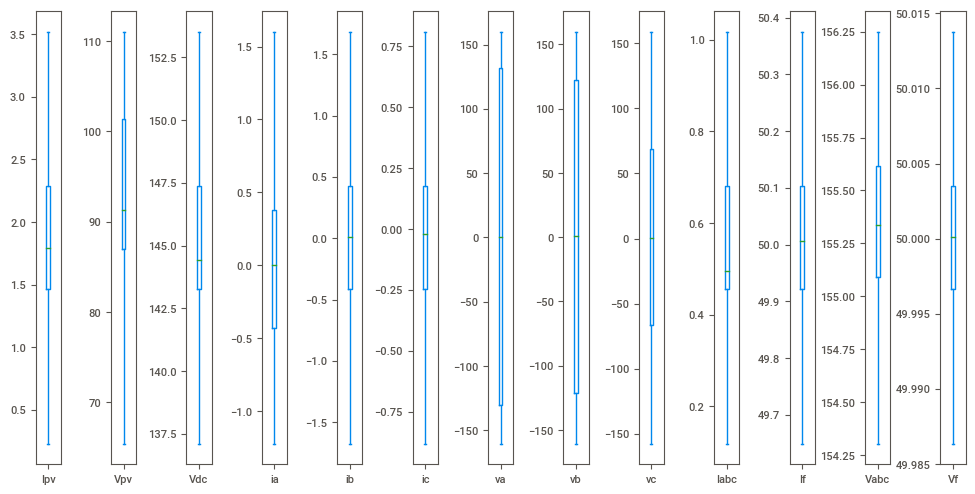

In [40]:
# OUTLIER ANALYSIS AFTER WINSORIZATION
# Multiple boxplots in a single visualization to see the outliers

num_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 6)) 

# increase spacing between subplots

plt.subplots_adjust(wspace = 2.0) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

# MinMax Scalar

MinMax scalar is a data scaling technique used in machine learning to transform numerical features to a fixed range, typically between 0 and 1. The technique involves subtracting the minimum value of the feature from all values, and then dividing by the range of the feature (which is the difference between the maximum and minimum values).

In [16]:
num_data.describe()

Ipv           Vpv           Vdc            ia            ib  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean       1.790278     91.908293    144.504399     -0.023839      0.003306   
std        0.569966     10.725784      3.384624      0.458427      0.444824   
min        0.229416     65.408325    137.109375     -1.222779     -1.675110   
25%        1.462585     87.005615    143.261719     -0.430543     -0.416260   
50%        1.793701     91.308594    144.433594     -0.000855      0.006714   
75%        2.284698    101.403809    147.363281      0.381835      0.422974   
max        3.517868    111.022949    153.515625      1.600402      1.681824   

                 ic            va            vb            vc          Iabc  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean      -0.022712      0.826952      0.822367      0.820387      0.524134   
std        0.319300    122.682533    115.623988     88.662816      0.175181   
min       -0.882024   -160.516968   -160.697784   -157.656047      0.118305   
25%       -0.247563   -130.046349   -120.881958    -66.751480      0.455268   
50%       -0.019292      0.277252      0.982437      0.648931      0.494286   
75%        0.175410    131.691780    122.153702     68.808772      0.679909   
max        0.809871    159.866028    159.829865    158.773092      1.016872   

                 If          Vabc            Vf  
count  21636.000000  21636.000000  21636.000000  
mean      50.014204    155.352013     50.000058  
std        0.171635      0.349439      0.006345  
min       49.648988    154.303372     49.986351  
25%       49.921243    155.091342     49.996633  
50%       50.006650    155.337372     50.000083  
75%       50.102746    155.616656     50.003487  
max       50.375002    156.249366     50.013769

In [17]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)])
scale = scale_columntransfer.fit(num_data)

In [18]:
solar_minmax = pd.DataFrame(scale.transform(num_data), columns = numeric_features)
solar_minmax

Ipv       Vpv       Vdc        ia     ib        ic        va  \
0      0.408372  0.787917  0.428571  0.385256  0.645  0.311508  0.631312   
1      0.398303  0.785776  0.375000  0.463734  0.353  0.728175  0.368952   
2      0.428222  0.780959  0.392857  0.378121  0.639  0.339286  0.630597   
3      0.409810  0.786579  0.357143  0.470868  0.363  0.720238  0.369591   
4      0.420742  0.781361  0.410714  0.378121  0.635  0.335317  0.630145   
...         ...       ...       ...       ...    ...       ...       ...   
21631  0.648878  0.479494  0.482143  0.625446  0.285  0.617063  0.110129   
21632  0.632192  0.467585  0.500000  0.209275  0.675  0.517857  0.894612   
21633  0.642261  0.475614  0.500000  0.623068  0.287  0.621032  0.111634   
21634  0.668153  0.473607  0.500000  0.211653  0.673  0.521825  0.892543   
21635  0.645713  0.478290  0.500000  0.627824  0.293  0.621032  0.111370   

             vb        vc      Iabc        If      Vabc        Vf  
0      0.033772  0.842908  0.981224  0.483479  0.000000  0.497813  
1      0.966303  0.155733  0.981224  0.483479  0.000000  0.497813  
2      0.033584  0.843035  0.981224  0.483479  0.000000  0.497813  
3      0.970026  0.152978  0.381634  0.375367  0.000000  1.000000  
4      0.032869  0.843479  0.214693  0.000000  0.000000  1.000000  
...         ...       ...       ...       ...       ...       ...  
21631  0.947537  0.440495  0.647605  0.259907  0.573715  0.413141  
21632  0.057954  0.556711  0.643726  0.454577  0.568187  0.506884  
21633  0.947161  0.441117  0.638598  0.785863  0.548203  0.515419  
21634  0.055058  0.556317  0.636723  0.639745  0.544553  0.497210  
21635  0.947537  0.442006  0.635043  0.350182  0.557378  0.634613  

[21636 rows x 13 columns]

In [19]:
solar_minmax.describe()

Ipv           Vpv           Vdc            ia            ib  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean       0.474650      0.580953      0.450744      0.424677      0.499985   
std        0.173324      0.235139      0.206301      0.162380      0.132509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.375000      0.473473      0.375000      0.280618      0.375000   
50%        0.475690      0.567806      0.446429      0.432818      0.501000   
75%        0.625000      0.789122      0.625000      0.568371      0.625000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 ic            va            vb            vc          Iabc  \
count  21636.000000  21636.000000  21636.000000  21636.000000  21636.000000   
mean       0.507899      0.503597      0.503920      0.500828      0.451641   
std        0.188724      0.382925      0.360730      0.280198      0.194956   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.375000      0.095107      0.124220      0.287283      0.375000   
50%        0.509921      0.501881      0.504419      0.500286      0.418423   
75%        0.625000      0.912061      0.882456      0.715689      0.625000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 If          Vabc            Vf  
count  21636.000000  21636.000000  21636.000000  
mean       0.503043      0.538872      0.499912  
std        0.236407      0.179568      0.231402  
min        0.000000      0.000000      0.000000  
25%        0.375000      0.404919      0.375000  
50%        0.492639      0.531348      0.500847  
75%        0.625000      0.674865      0.625000  
max        1.000000      1.000000      1.000000

In [45]:
# Save the MinMaxScaler Model
joblib.dump(scale, 'Scaled_Data')

['Scaled_Data']

# Model selection

### Splitting data

In [20]:
#splitting data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(solar_minmax, Y, test_size = 0.2, random_state=0)


In [21]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=100),
               'Logistic Regression': LogisticRegression(solver='sag', max_iter=1000),
               'SVM': SVC(kernel='linear'),
               'DecisionTree': DecisionTreeClassifier(),
               'knn': KNeighborsClassifier(),
               'Naive Bayes': GaussianNB(),
               'Gradient Boosting': GradientBoostingClassifier()}
    
# Iterate over the classifiers
for name, classifier in classifiers.items():
    # Fit the algorithm to the training data
    classifier.fit(X_train, Y_train)
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    # Print the accuracy score on the test set
    print(f'{name} Test Accuracy: {accuracy_score(Y_test, y_pred):.3f}')
    # Print the classification report on the test set
    print(f'{name} Test classification report:\n{classification_report(Y_test, y_pred)}')

Random Forest Test Accuracy: 0.987
Random Forest Test classification report:
              precision    recall  f1-score   support

         F0L       0.97      1.00      0.98       291
         F0M       0.98      0.99      0.99       279
         F1L       0.97      1.00      0.98       274
         F1M       0.99      1.00      0.99       302
         F2L       0.98      0.87      0.92       252
         F2M       1.00      1.00      1.00       294
         F3L       0.95      0.98      0.96       197
         F3M       0.99      0.98      0.99       139
         F4L       1.00      1.00      1.00       309
         F4M       1.00      1.00      1.00       263
         F5L       1.00      1.00      1.00       295
         F5M       1.00      0.98      0.99       296
         F6L       0.98      0.99      0.99       289
         F6M       1.00      1.00      1.00       277
         F7L       0.99      0.99      0.99       281
         F7M       0.99      0.99      0.99       290

   

# Based on these results, we can conclude that the Random Forest method is the most effective model for detecting fault cases in this particular dataset. The high accuracy and precision of the Random Forest method make it a reliable model for classifying fault and non-fault cases.

# Now lets check train data accuracy on Random forest classifier model

In [22]:
# Train the model on the training data
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict the labels on the training data
Y_train_pred = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


# Hyperparameter tunning

Hyperparameter tuning refers to the process of selecting the optimal set of hyperparameters for a machine learning algorithm. Hyperparameters are parameters that are set before training a model, and they affect how the model learns and generalizes from the data.

In [23]:
# Define the parameter grid for the random search
param_dist = {'n_estimators': sp_randint(50, 200),
              'max_depth': [3, None],
              'max_features': sp_randint(1, X.shape[1]),
              'min_samples_split': sp_randint(2, 11),
              'min_samples_leaf': sp_randint(1, 11),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Create a random forest classifier
random_forest = RandomForestClassifier()

# Define a custom scorer for recall
recall_scorer = make_scorer(recall_score, greater_is_better=True)

# Create the randomized search object
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring=recall_scorer)

# Fit the randomized search object to the data
random_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_
print("Best Parameters: ",best_params)


Best Parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 141}


In [24]:

# Represent the model with the best parameters
rfc_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=None, max_features=12, min_samples_leaf=5, 
                                   min_samples_split=10, n_estimators=146)

# Fit the model to the training data
rfc_model.fit(X_train, Y_train)

# Use the model to predict on the test data
y_pred = rfc_model.predict(X_test)


In [25]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         F0L       0.97      0.95      0.96       291
         F0M       0.96      0.97      0.96       279
         F1L       0.97      0.98      0.98       274
         F1M       0.98      0.97      0.98       302
         F2L       0.85      0.87      0.86       252
         F2M       1.00      0.99      0.99       294
         F3L       0.94      0.96      0.95       197
         F3M       0.94      0.96      0.95       139
         F4L       1.00      0.99      1.00       309
         F4M       1.00      1.00      1.00       263
         F5L       1.00      1.00      1.00       295
         F5M       0.98      0.94      0.96       296
         F6L       0.98      0.98      0.98       289
         F6M       1.00      0.99      0.99       277
         F7L       0.96      0.95      0.96       281
         F7M       0.96      0.99      0.97       290

    accuracy                           0.97      4328
   macro avg       0.97   

# Let see ROC curve

ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model, which shows the tradeoff between the true positive rate (TPR) and false positive rate (FPR) for different thresholds.

The ROC curve is created by plotting the TPR (sensitivity) on the y-axis against the FPR (1 - specificity) on the x-axis for different threshold values. A threshold is used to decide whether a sample belongs to the positive or negative class. By varying the threshold, we can obtain a range of points on the ROC curve.

In [33]:
y_pred_proba = classifiers['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba, pos_label= 0)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [65]:
# Predict the class on test data
pred = rfc_model.predict(X_test)

pred

array(['F2M', 'F1L', 'F7L', ..., 'F2L', 'F7M', 'F0M'], dtype=object)

In [66]:
print(skmet.accuracy_score(Y_test, pred))  # Accuracy measure

0.9690388170055453


In [68]:
# Predict the class on test data
pred_train = rfc_model.predict(X_train)

pred_train

array(['F3M', 'F6M', 'F6M', ..., 'F7L', 'F7L', 'F2L'], dtype=object)

In [69]:
print(skmet.accuracy_score(Y_train, pred_train))  # Accuracy measure

0.9917957014097527


In [70]:
# Classification_report for RFC model for test data

rfc_test_report = classification_report(Y_test, pred)
print(rfc_test_report)

              precision    recall  f1-score   support

         F0L       0.97      0.95      0.96       291
         F0M       0.96      0.97      0.96       279
         F1L       0.97      0.98      0.98       274
         F1M       0.98      0.97      0.98       302
         F2L       0.85      0.87      0.86       252
         F2M       1.00      0.99      0.99       294
         F3L       0.94      0.95      0.95       197
         F3M       0.94      0.96      0.95       139
         F4L       1.00      0.99      1.00       309
         F4M       1.00      1.00      1.00       263
         F5L       1.00      1.00      1.00       295
         F5M       0.98      0.94      0.96       296
         F6L       0.97      0.98      0.97       289
         F6M       1.00      0.99      0.99       277
         F7L       0.96      0.95      0.96       281
         F7M       0.96      0.99      0.97       290

    accuracy                           0.97      4328
   macro avg       0.97   

In [71]:
# Classification_report for KNN model for test data

rfc_train_report = classification_report(Y_train, pred_train)
print(rfc_train_report)

              precision    recall  f1-score   support

         F0L       0.99      1.00      0.99      1147
         F0M       0.99      0.99      0.99      1132
         F1L       1.00      0.99      0.99      1016
         F1M       0.99      0.99      0.99      1088
         F2L       0.98      0.96      0.97      1169
         F2M       1.00      1.00      1.00      1146
         F3L       0.98      1.00      0.99       838
         F3M       0.98      0.99      0.98       561
         F4L       1.00      1.00      1.00      1131
         F4M       1.00      1.00      1.00      1177
         F5L       1.00      1.00      1.00      1135
         F5M       0.99      0.99      0.99      1144
         F6L       0.98      0.99      0.99      1151
         F6M       1.00      0.99      1.00      1163
         F7L       0.99      0.99      0.99      1160
         F7M       0.99      0.99      0.99      1150

    accuracy                           0.99     17308
   macro avg       0.99   

# After model tunning KNN model is giving better accuracy, precision

In [74]:
# Save the model

pickle.dump(rfc_model,open('rfc_model.pkl','wb'))


In [75]:
model=pickle.load(open('rfc_model.pkl','rb'))

In [76]:
model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=12,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=146)